### <center> Cornell Birdcall Identification </center>

## 1. Business Problem:-
### 1.1 Description 

Do you hear the birds chirping outside your window? Over 10,000 bird species occur in the world, and they can be found in nearly every environment, from untouched rainforests to suburbs and even cities. Birds play an essential role in nature. They are high up in the food chain and integrate changes occurring at lower levels. As such, birds are excellent indicators of deteriorating habitat quality and environmental pollution. However, it is often easier to hear birds than see them. With proper sound detection and classification, researchers could automatically intuit factors about an area’s quality of life based on a changing bird population.

There are already many projects underway to extensively monitor birds by continuously recording natural soundscapes over long periods. However, as many living and nonliving things make noise, the analysis of these datasets is often done manually by domain experts. These analyses are painstakingly slow, and results are often incomplete. Data science may be able to assist, so researchers have turned to large crowdsourced databases of focal recordings of birds to train AI models. Unfortunately, there is a domain mismatch between the training data (short recording of individual birds) and the soundscape recordings (long recordings with often multiple species calling at the same time) used in monitoring applications. This is one of the reasons why the performance of the currently used AI models has been subpar.
<img src="https://storage.googleapis.com/kaggle-media/competitions/Birdsong/Bewick's%20Wren%20%C2%A9%20Derek%20Hameister%20_%20Macaulay%20Library%20at%20the%20Cornell%20Lab%20of%20Ornithology%20ML214764391.png" />

To unlock the full potential of these extensive and information-rich sound archives, researchers need good machine listeners to reliably extract as much information as possible to aid data-driven conservation.

The Cornell Lab of Ornithology’s Center for Conservation Bioacoustics (CCB)’s mission is to collect and interpret sounds in nature. The CCB develops innovative conservation technologies to inspire and inform the conservation of wildlife and habitats globally. By partnering with the data science community, the CCB hopes to further its mission and improve the accuracy of soundscape analyses.

In this case study, we will identify a wide variety of bird vocalizations in soundscape recordings. Due to the complexity of the recordings, they contain weak labels. There might be anthropogenic sounds (e.g., airplane overflights) or other bird and non-bird (e.g., chipmunk) calls in the background, with a particular labeled bird species in the foreground. we will try to bring new ideas to build effective detectors and classifiers for analyzing complex soundscape recordings!

CREDITS:- Kaggle

### 1.2 Problem Statement 
For each time window, we need to predict the bird species that made a call beginning or ending in that time window. If there are no bird calls in a time window, we will predict nocall.

### 1.3 Sources/Useful Links

1. Source:- https://www.kaggle.com/c/birdsong-recognition
2. Data:- https://www.kaggle.com/c/birdsong-recognition/data
3. https://www.kaggle.com/c/birdsong-recognition/discussion/158933
4. https://www.kaggle.com/c/birdsong-recognition/discussion/162688
5. https://www.kaggle.com/cwthompson/birdsong-making-a-prediction
6. https://www.researchgate.net/publication/328418948_Bird_Call_Recognition_using_Deep_Convolutional_Neural_Network_ResNet-50
7. http://ceur-ws.org/Vol-2380/paper_68.pdf
8. http://ceur-ws.org/Vol-2380/paper_52.pdf
9. https://stackoverflow.com/questions/53788434/training-a-keras-model-from-batches-of-npy-files-using-generator
10. https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly
11. https://arxiv.org/ftp/arxiv/papers/1803/1803.01107.pdf

#### 1.3.1 Real world/Business Objectives and Constraints 
1. CPU Notebook <= 9 hours run-time
2. GPU Notebook <= 2 hours run-time
3. No internet access enabled
4. External data, freely & publicly available, is allowed. This includes pre-trained models.

## 2. ML/DL  Probelm 
### 2.1 Data 
#### 2.1.1 Data Overview 

* **Source**:- https://www.kaggle.com/c/birdsong-recognition/data

* **Description** 

    * **train_audio** The train data consists of short recordings of individual bird calls generously uploaded by users of xenocanto.org.

    * **test_audio** The hidden test_audio directory contains approximately 150 recordings in mp3 format, each roughly 10 minutes long. They will not all fit in a notebook's memory at the same time. The recordings were taken at three separate remote locations in North America. Sites 1 and 2 were labeled in 5 second increments and need matching predictions, but due to the time consuming nature of the labeling process the site 3 files are only labeled at the file level. Accordingly, site 3 has relatively few rows in the test set and needs lower time resolution predictions.
    Two example soundscapes from another data source are also provided to illustrate how the soundscapes are labeled and the hidden dataset folder structure. The two example audio files are BLKFR-10-CPL_20190611_093000.pt540.mp3 and ORANGE-7-CAP_20190606_093000.pt623.mp3. These soundscapes were kindly provided by Jack Dumbacher of the California Academy of Science's Department of Ornithology and Mammology.

    * **test.csv** Only the first three rows are available for download; the full test.csv is in the hidden test set.

        * site: Site ID.

        * row_id: ID code for the row.

        * seconds: the second ending the time window, if any. Site 3 time windows cover the entire audio file and have null entries for seconds.

        * audio_id: ID code for the audio file.

    * **example_test_audio_metadata.csv** Complete metadata for the example test audio. These labels have higher time precision than is used for the hidden test set.

    * **example_test_audio_summary.csv** Metadata for the example test audio, converted to the same format as used in the hidden test set.

        * filename_seconds: a row identifier.

        * birds: all ebird codes present in the time window.

        * filename

        * seconds: the second ending the time window.

    * **train.csv** A wide range of metadata is provided for the training data. The most directly relevant fields are:

        * ebird_code: a code for the bird species. You can review detailed information about the bird codes by appending the code to https://ebird.org/species/, such as https://ebird.org/species/amecro for the American Crow.

        * recodist: the user who provided the recording.

        * location: where the recording was taken. Some bird species may have local call 'dialects', so you may want to seek geographic diversity in your training data.

        * date: while some bird calls can be made year round, such as an alarm call, some are restricted to a specific season. You may want to seek temporal diversity in your training data.

        * filename: the name of the associated audio file.


### 2.2 Mapping the real world problem to an ML/DL problem 
#### 2.2.1 Type of ML/DL Problem
It is a multiclass multilabel classification problem, where our objective is to identify which birds are calling in long recordings, given training data generated in meaningfully different contexts. This is the exact problem facing scientists trying to automate the remote monitoring of bird populations.

#### 2.2.2 Performance Metric 
Metric(s): 
* Row-wise micro averaged F1 score : https://www.kaggle.com/c/birdsong-recognition/overview/evaluation

### 2.3 Train and Test Construction
We build train and test by stratified random split of the data in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with.

## 3. Exploratory Data Analysis

### 3.1.Data Preprocessing 
#### 3.1.1 Downloading data and storing in the local machine

In [2]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/19596/1292430/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1596178579&Signature=J89g1GnvIZ%2BRtPeM7LKnX1JVGym%2FLljbm2LZlSj5SgKzYYZ9AsR%2FgTkuVJhOfBtAFB%2FDdHDd2ESDAtoj1ajrgJmYDbq0RCZi5AmwWb0pyYDCxp6KLpvx13PrcFoWbYoEdg2etAiBg7XF%2B%2FEx831wcnfMhl%2B7TFZqqG54YGNhMs0H5lvwkfrwnVhz%2BDvwkdKDQYDN4pVwKP%2Fwt313f4KDqgMA590PAe7CbfxFMIowqrkdSNdjkJlQ2v0t4mCBXdMZ9Dnl236S2jMYHuNcMcWy7SRgfCdUG7NUCf%2Bt54PLTBEuiNcb5Lh7iY0NLSgTAmuwEbAtAmMlwqngYPCujr54cQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dbirdsong-recognition.zip" -c -O 'birdsong-recognition.zip'

--2020-07-28 06:57:13--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/19596/1292430/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1596178579&Signature=J89g1GnvIZ%2BRtPeM7LKnX1JVGym%2FLljbm2LZlSj5SgKzYYZ9AsR%2FgTkuVJhOfBtAFB%2FDdHDd2ESDAtoj1ajrgJmYDbq0RCZi5AmwWb0pyYDCxp6KLpvx13PrcFoWbYoEdg2etAiBg7XF%2B%2FEx831wcnfMhl%2B7TFZqqG54YGNhMs0H5lvwkfrwnVhz%2BDvwkdKDQYDN4pVwKP%2Fwt313f4KDqgMA590PAe7CbfxFMIowqrkdSNdjkJlQ2v0t4mCBXdMZ9Dnl236S2jMYHuNcMcWy7SRgfCdUG7NUCf%2Bt54PLTBEuiNcb5Lh7iY0NLSgTAmuwEbAtAmMlwqngYPCujr54cQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dbirdsong-recognition.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 142.250.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23749499645 (22G) [application/zip]
Saving to: ‘birdsong-recognition.z

In [5]:
# Installing audio processing packages
# !sudo apt-get -y install libsndfile1
# !pip install librosa
# !pip install pydub

# getting requirements to an external txt file
# !conda list --export > package-list.txt
# !conda create -n myenv --file package-list.txt

#### 3.1.2 Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import zipfile
from IPython.display import Audio
from pydub import AudioSegment
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import pickle
import random
from tqdm import tqdm
import datetime
from audiomentations import *
import multiprocessing
import cv2
# # library used to process the audio files
import librosa
import librosa.display
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, Conv2D, Softmax, LSTM, Embedding, concatenate
from tensorflow.keras.layers import Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50, InceptionV3, VGG16
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau, EarlyStopping
from IPython.display import Image

###### 3.1.3 Checking the data

In [3]:
# loading train data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head(3)

rating playback_used ebird_code    channels        date          pitch  \
0     3.5            no     aldfly    1 (mono)  2013-05-25  Not specified   
1     4.0            no     aldfly  2 (stereo)  2013-05-27           both   
2     4.0            no     aldfly  2 (stereo)  2013-05-27           both   

   duration      filename          speed           species  ...   xc_id  \
0        25  XC134874.mp3  Not specified  Alder Flycatcher  ...  134874   
1        36  XC135454.mp3           both  Alder Flycatcher  ...  135454   
2        39  XC135455.mp3           both  Alder Flycatcher  ...  135455   

                                 url        country            author  \
0  https://www.xeno-canto.org/134874  United States  Jonathon Jongsma   
1  https://www.xeno-canto.org/135454  United States       Mike Nelson   
2  https://www.xeno-canto.org/135455  United States       Mike Nelson   

                        primary_label longitude         length   time  \
0  Empidonax alnorum_Alder Flycatcher   -92.962  Not specified   8:00   
1  Empidonax alnorum_Alder Flycatcher  -82.1106         0-3(s)  08:30   
2  Empidonax alnorum_Alder Flycatcher  -82.1106         0-3(s)  08:30   

          recordist                                            license  
0  Jonathon Jongsma        Creative Commons Attribution-ShareAlike 3.0  
1       Mike Nelson  Creative Commons Attribution-NonCommercial-Sha...  
2       Mike Nelson  Creative Commons Attribution-NonCommercial-Sha...  

[3 rows x 35 columns]

* `train.csv` contains information about the audio files available in `train_audio`. It contains 21,375 datapoints in 35 unique columns.

**Note**: The TRAIN data has 1 labeled bird species per recording. However, in nature usually you can hear tens (even hundreds) of birds in one go, so in TEST set we need to predict 0, 1 or multiple species for one recording. Because of this, in TRAIN we have `species` column - or primary_label - (main bird), secondary label(other birds heard) and background(background noises, other birds etc.)

In [4]:
test_df.head(3)

site                                      row_id  seconds  \
0  site_1   site_1_0a997dff022e3ad9744d4e7bbf923288_5        5   
1  site_1  site_1_0a997dff022e3ad9744d4e7bbf923288_10       10   
2  site_1  site_1_0a997dff022e3ad9744d4e7bbf923288_15       15   

                           audio_id  
0  0a997dff022e3ad9744d4e7bbf923288  
1  0a997dff022e3ad9744d4e7bbf923288  
2  0a997dff022e3ad9744d4e7bbf923288

* `test.csv` contains only 3 observations (the rest are available in the *hidden test set*).

* `site`: there are 3 sites in total, with first 2 having labeles every 5 seconds, while site_3 has labels at file level.
* `row_id`: this is the unique ID that will be used for the submission
* `seconds`: how long the clip is
* `audio_id`: `row_id` without site

>Note: "nocall" can be also one of the labels (hearing no bird).

### 3.2 Analyzing data
Our objective here is to analyze the audios provided and find insights about the files given. Let us dive deep and learn about the audio provided.

In [4]:
# checking the train data set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21375 entries, 0 to 21374
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            21375 non-null  float64
 1   playback_used     19575 non-null  object 
 2   ebird_code        21375 non-null  object 
 3   channels          21375 non-null  object 
 4   date              21375 non-null  object 
 5   pitch             21375 non-null  object 
 6   duration          21375 non-null  int64  
 7   filename          21375 non-null  object 
 8   speed             21375 non-null  object 
 9   species           21375 non-null  object 
 10  number_of_notes   21375 non-null  object 
 11  title             21375 non-null  object 
 12  secondary_labels  21375 non-null  object 
 13  bird_seen         19575 non-null  object 
 14  sci_name          21375 non-null  object 
 15  location          21375 non-null  object 
 16  latitude          21375 non-null  object

In [6]:
# Checking the unique types of bird species in the data
print("Number of bird species:",len(train_df['species'].unique()))

Number of bird species: 264


In [7]:
y_labels = train_df['ebird_code'].unique()
print("Bird species in abbrebviated: ",y_labels[:5])
print("BIrd Speccies: ",train_df['species'].unique()[:5])

Bird species in abbrebviated:  ['aldfly' 'ameavo' 'amebit' 'amecro' 'amegfi']
BIrd Speccies:  ['Alder Flycatcher' 'American Avocet' 'American Bittern' 'American Crow'
 'American Goldfinch']


###### Observation
We can see that train data set contains 21375 audio file path belonging to 264 different bird species calls.
Each bird species is abbreviated to their own ebird code to help in ease of labeling of the classes in the data set which can be seen in the **ebird_code** column of the train data set.

We have given sounds of 264 different unique bird species all over the world. some of the common bird species can be seen above. The name of the bird species is abbreviated for more readability and ease. let us see the recording availabel per bird species. 

Here, **Alder Flycatcher** species is abbreviated as **aldfly** first three letter from word Alder while last three from Flycatcher. Similarly, **American Avocet** as **ameavo** in the same manner. In this way we 264 different bird species abbreviated as 264 class labels.

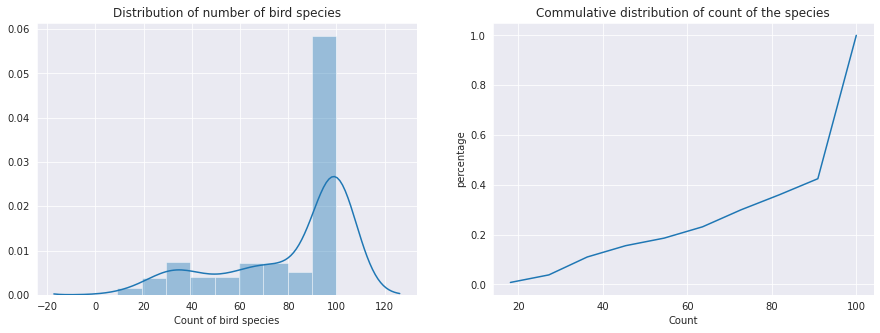

In [4]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
sns.distplot(train_df.species.value_counts(),ax=ax1)
ax1.set_title("Distribution of number of bird species")
ax1.set_xlabel("Count of bird species")

counts, bin_edges = np.histogram(train_df.species.value_counts(), bins=10, density = True)

# plotting cdf 
# https://stackoverflow.com/questions/10640759/how-to-get-the-cumulative-distribution-function-with-numpy
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
ax2 = fig.add_subplot(122)
ax2.plot(bin_edges[1:], cdf)
ax2.set_title("Commulative distribution of count of the species")
ax2.set_xlabel("Count")
ax2.set_ylabel("percentage")
plt.show()

###### Observation
The data contains 100 recordings per bird species for most of the birds provided. From the above output we can see that around 40% of the species out of 264 have less than 90 recordings while rest of them have more than 90 and maximum of 100 recording per species making them balanced class.
That means 50% of the class labels are balanced each with 100 data points while rest of them are imbalanced having data points 1 to 100.

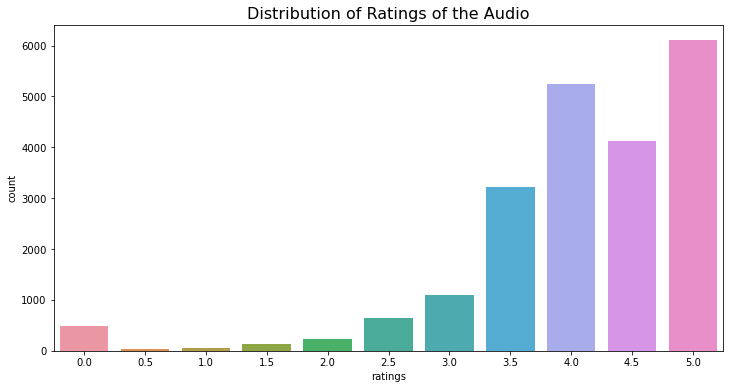

In [10]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='rating',data=train_df)
plt.title("Distribution of Ratings of the Audio", fontsize=16)
plt.xlabel("ratings")
plt.show()

###### Observation
The plot describes the distribution of the audio recordings. From the plot we can see that 75% of the audio recordings provided for the training are of rating greater than 3 indicating the good quality of the audio recordings. Among them, 5 being the highest rating given is the rating which is given to around 6000 of the recordings out of 21k recordings.

In [11]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='pitch',data=train_df)
plt.title("Pitch of the recordings(High/low)", fontsize=16)
plt.xlabel("pitch")
plt.show()

###### Observation
Let us look at the distribution of the pitch of the sound. **Pitch**:-The sensation of a frequency is commonly referred to as the pitch of a sound. A high pitch sound corresponds to a high frequency sound wave and a low pitch sound corresponds to a low frequency sound wave. Generally, we have low and high pitch sound but as shown in graph, more than 70% of the recordings provided does not give any info on the pitch of the sound i.e is it either increasing or decreasing. For some examples less than 2%, the pitch is specified as increasing or decreasing meaning some birds call is a high pitched sound while for some it is low.

In [131]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='channels',data=train_df)
plt.title("Channels used", fontsize=16)
plt.xlabel("channels")
plt.show()

###### Observation
The above plot shows the types of channels used in the recordings. Basically, number of channels used is the number of signals in the sound.

https://music.stackexchange.com/questions/24631/what-is-the-difference-between-mono-and-stereo
In monaural sound one single channel is used. It can be reproduced through several speakers, but all speakers are still reproducing the same copy of the signal.
In stereophonic sound more channels are used (typically two). You can use two different channels and make one feed one speaker and the second channel feed a second speaker (which is the most common stereo setup). This is used to create directionality, perspective, space.
So, from our plot we observe that more than 50% of the data have recordings with number of channels as 1.

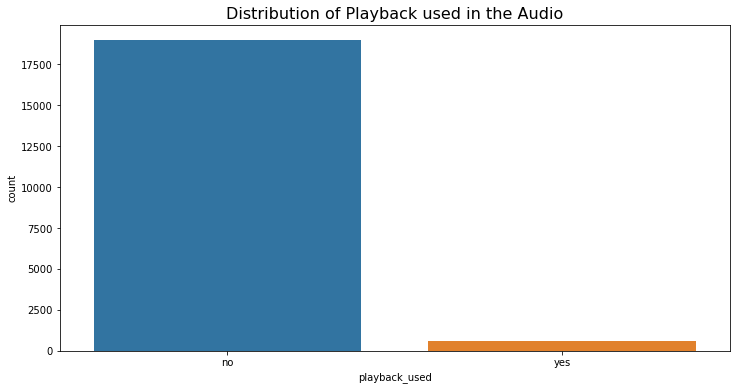

In [201]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='playback_used',data=train_df)
plt.title("Distribution of Playback used in the Audio", fontsize=16)
plt.xlabel("playback_used")
plt.show()

###### Observation
The playback used in the audio is similar to the feedback concept meaning it is way to reproduce audio, video recording to recheck them. The playback not used in the audio means that the audio recorded has not been reproduced or altered and is provided as it is. As from our distribution above we can see that around 18000 out of 21000 recordings provided have not used playback audio.

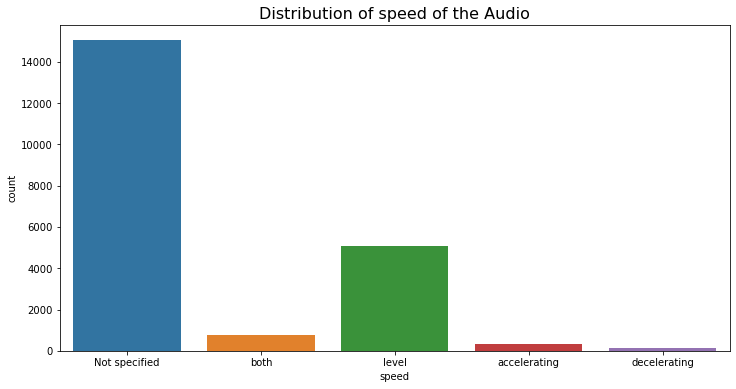

In [133]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='speed',data=train_df)
plt.title("Distribution of speed of the Audio", fontsize=16)
plt.xlabel("speed")
plt.show()

###### Observation
The distribution plot above shows the files available in the data set is recorded at what speed i.e normal, fast forwarded or in slow mode. From the plot we observe that similar to pitch distribution, most of them is not specified. Around 70% of them belongs to the column not specified. 

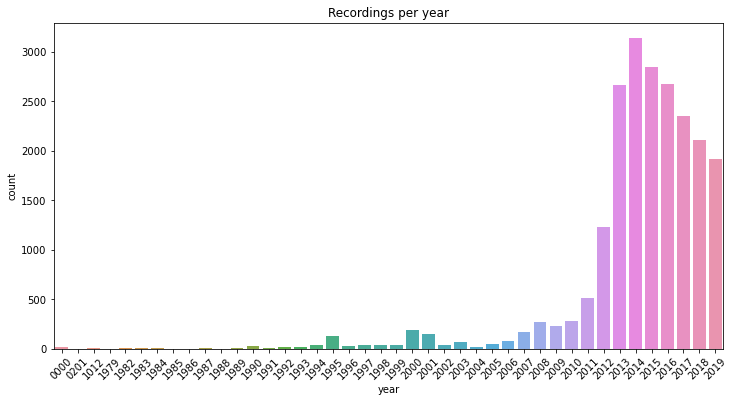

In [150]:
year = train_df['date'].apply(lambda x:x.split('-')[0])
plt.figure(figsize=(12,6))
ax = sns.countplot(year)
plt.title("Recordings per year")
plt.xlabel("year")
plt.xticks(rotation=45)
plt.show()

###### Observation
The plot above shows the year in which the recordings of the birdcall is made. From the plot it is observed that 90% of the recordings have made in the last 10 years or so while year 2014 being the year when highest number(around 14% of the total) of the recordings has been done.

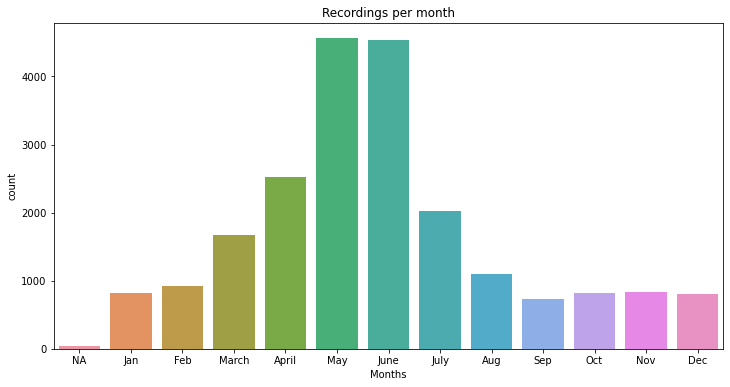

In [156]:
plt.figure(figsize=(12,6))
months = train_df['date'].apply(lambda x:x.split('-')[1])
ax = sns.countplot(months)
plt.title("Recordings per month")
plt.xlabel("Months")
ax.set_xticklabels(['NA','Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.show()

###### Observation
This plot distribution shows the month in which the recordings has been done or the month in which birds called or sang. From the plot it is observed that 80% of the bird's call is from the months March to August i.e 6 months interval which suggests that the most of the birds called during season `Spring` March to May and `Summer` June to Aug.

Text(0.5, 1.0, 'Top 10 countries where recording is done.')

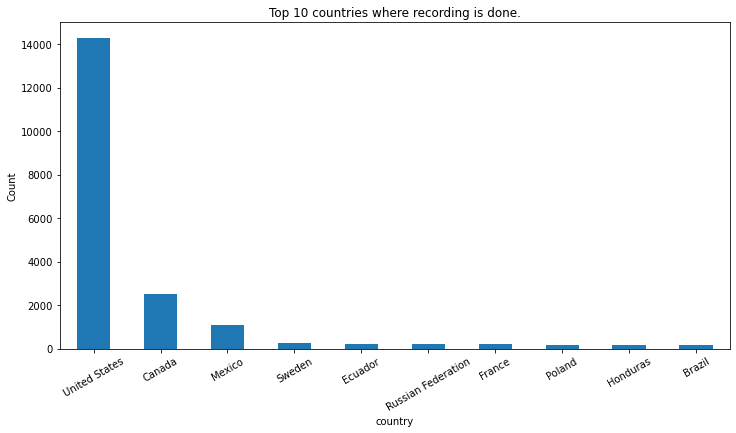

In [126]:
plt.figure(figsize=(12,6))
train_df.country.value_counts().head(10).plot(kind='bar')
plt.xlabel("country")
plt.xticks(rotation=30)
plt.ylabel("Count")
plt.title("Top 10 countries where recording is done.")
plt.show()

In [7]:
train_df.type.value_counts()

song                                              6718
call                                              6410
flight call                                       1203
call, song                                        1177
male, song                                         620
                                                  ... 
call, display, male                                  1
call, flock about 60 birds                           1
Flushed call, call                                   1
call, chase call, interaction rasp, wing whine       1
Multiple birds singing, male, song                   1
Name: type, Length: 1267, dtype: int64

###### Observation
The plot titled `Top 10 countries where recording is done` shows top 10 countries where recordings has been done based on the number of recordings per country. From the plot it is obvious that around 70% of the recordings is from USA and more than 75% from the North America continent itself.

The counts below the plot cell depicts the types of the sounds made by the birds ex. call, song, chase call, interactiion rasp etc. From the count, it is seen that around 25% of the recordings is song and call each while rest are combination of many types of sounds made by the birds.

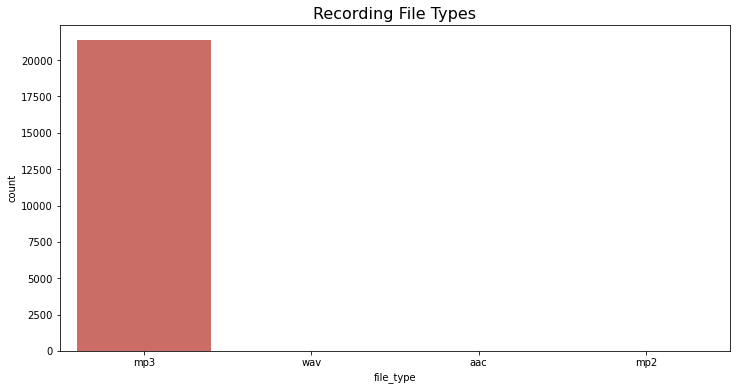

In [121]:
plt.figure(figsize=(12,6))
ax = sns.countplot(train_df['file_type'], palette = "hls", order = train_df['file_type'].value_counts().index)
plt.title("Recording File Types", fontsize=16)
plt.show()

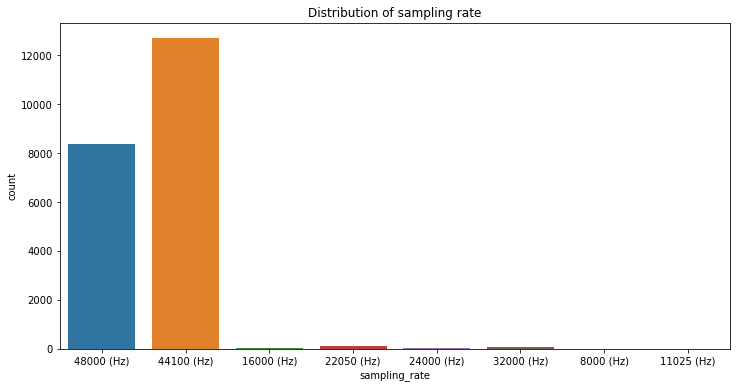

In [122]:
# counting plot of sampling rate of the audio file at which they are recorded
plt.figure(figsize=(12,6))
sns.countplot(x='sampling_rate',data=train_df)
plt.title('Distribution of sampling rate')
plt.show()

###### Observation
The plot titled `Recordings File Types` is plot showing the distribution of file types of the recordings. From the plot it is evident that the the recordings are available in four types of file:- mp3, wav, aac and mp2. But, around 99% of the recordings provided are in mp3 format.

The plot titled `sampling rate` show the distribution of smapling rate at which the recordings has been sampled i.e the number of samples of audio carried per second, measured in Hz or kHz. From the graph we can see that recordings we have contains 8 types of sampling rate while more than 95% of them are sampled at 44100 and 48000 Hz. The sampling rate at which most of the recordings is made is 44100 Hz.

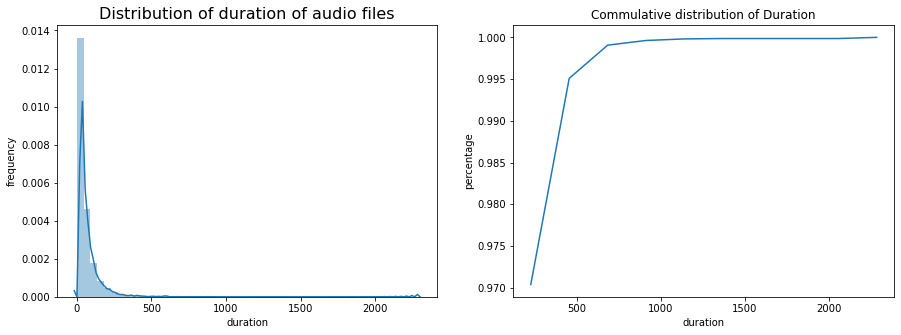

In [38]:
# https://seaborn.pydata.org/generated/seaborn.distplot.html
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
sns.distplot(train_df['duration'],ax=ax1)
ax1.set_title("Distribution of duration of audio files", fontsize=16)
ax1.set_ylabel("frequency")
counts, bin_edges = np.histogram(train_df['duration'], bins=10, density = True)

# plotting cdf 
# https://stackoverflow.com/questions/10640759/how-to-get-the-cumulative-distribution-function-with-numpy
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
ax2 = fig.add_subplot(122)
ax2.plot(bin_edges[1:], cdf)
ax2.set_title("Commulative distribution of Duration")
ax2.set_xlabel("duration")
ax2.set_ylabel("percentage")
plt.show()

In [43]:
for i in range(5,9):
    print("{}th percentile of duration ".format(i*10),np.percentile(train_df['duration'], (i*10)))

for i in range(90,100):
    print("{}th percentile of duration ".format(i),np.percentile(train_df['duration'],i+1))

50th percentile of duration  33.0
60th percentile of duration  43.0
70th percentile of duration  58.0
80th percentile of duration  81.0
90th percentile of duration  134.0
91th percentile of duration  143.0
92th percentile of duration  154.0
93th percentile of duration  166.0
94th percentile of duration  182.0
95th percentile of duration  202.0
96th percentile of duration  227.0
97th percentile of duration  266.0
98th percentile of duration  364.0
99th percentile of duration  2283.0


##### Observation
The duration distribution plot above is done to observe the duration of the recordings file. The distribution starts at 0 and is rightly skewed. The minimun duration of the recordings is 0 seconds and around 70% of the recordings's duration is below 100 seconds, while around 99% of recordings have duration less than 500 seconds.
From the above distribution plots titled `Distribution of duration of audio files` and `Commulative distribution of Duration`respectively we observe that 98% of the data is less than 250 seconds long while 99 percent of the data  is less than 500 seconds (8 minutes) long. 
To have a clear idea we printed the percentiles of the duration and observed that 90 percent of the data is around 2 minutes long in length.

### 3.3 Ok, let's hear some birdcalls!

In [9]:
# adding full file path of the audios to the dataframe
train_df['filepath'] = audio_path
train_df.head(2)

rating playback_used ebird_code    channels        date          pitch  \
0     3.5            no     aldfly    1 (mono)  2013-05-25  Not specified   
1     4.0            no     aldfly  2 (stereo)  2013-05-27           both   

   duration      filename          speed           species  ...  \
0        25  XC134874.mp3  Not specified  Alder Flycatcher  ...   
1        36  XC135454.mp3           both  Alder Flycatcher  ...   

                                 url        country            author  \
0  https://www.xeno-canto.org/134874  United States  Jonathon Jongsma   
1  https://www.xeno-canto.org/135454  United States       Mike Nelson   

                        primary_label longitude         length   time  \
0  Empidonax alnorum_Alder Flycatcher   -92.962  Not specified   8:00   
1  Empidonax alnorum_Alder Flycatcher  -82.1106         0-3(s)  08:30   

          recordist                                            license  \
0  Jonathon Jongsma        Creative Commons Attribution-ShareAlike 3.0   
1       Mike Nelson  Creative Commons Attribution-NonCommercial-Sha...   

                          filepath  
0  train_audio/aldfly/XC134874.mp3  
1  train_audio/aldfly/XC135454.mp3  

[2 rows x 36 columns]

In [37]:
# let us take the call of ALder FLycatcher
aldfly = train_df[train_df['ebird_code'] == "aldfly"].sample(5, random_state = 45)['filepath'].values
# let us hear the call
Audio(aldfly[1])
# aldfly

## 4. Understanding Audio data and Feature Extraction

### 4.1 Loading and processing audio files using librosa
The librosa library load the audio files into two major components:
1. **Sound**:(samples) sequence of vibrations in varying pressure strengths as array of numbers
2. **Sample Rate**: (sample_rate) is the number of samples of audio carried per second, measured in Hz or kHz

In [38]:
# checking how the librosa library process audio files
samples, sample_rate = librosa.load(aldfly[1], sr=44100)
print("Audio file processed sample: ",np.random.choice(samples, 10))
print("Shape of the aray in which audio file loaded:",samples.shape)
print("Sample_rate(KHz) at which audio is processed: ",sample_rate)

# Verify length of the audio
print('Check Len of Audio:',librosa.get_duration(samples,sample_rate))

Audio file processed sample:  [ 4.8370361e-03 -3.0670166e-03 -2.1331787e-02  7.6751709e-03
 -2.8076172e-03  4.5928955e-03 -5.2642822e-02  6.1035156e-05
 -7.1258545e-03  2.4719238e-03]
Shape of the aray in which audio file loaded: (1601280,)
Sample_rate(KHz) at which audio is processed:  44100
Check Len of Audio: 36.310204081632655


##### Observation
Here, we used librosa load function to read the audio files. The load function takes two arguments audio file path and sample rate at which it samples the audio file and returns array of samples and the sample rate. As observed, we used sample rate of 44100Hz that means we sampled 44100 samples per second from the audio file. From the the analysis we found that most of audio gien in the data set is sampled at 44100Hz and according the refernce papers of audio processing we found 44100Hz to be the standard sampling rate. So, we will go ahead with this sampling rate for our data processing. The samples is an array of shape (1601280,) got using sample_rate multiplied by duration of the file. 
As seen above the duration of the audio files differ so we will get different and much larger or even smaller samples array for every file.

### 4.2 Let us explore feature extraction techniques using librosa
### 4.2.1 2D representation of sound waves

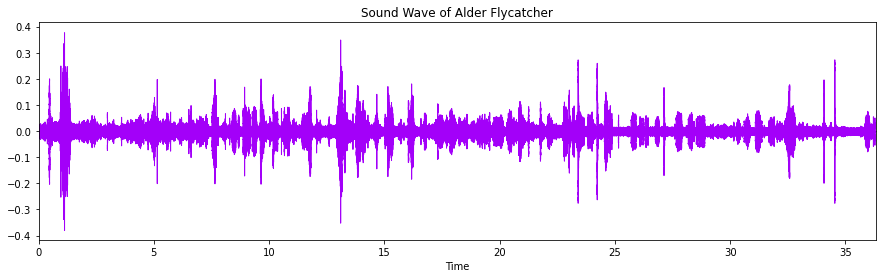

In [39]:
plt.figure(figsize=(15,4))
plt.title('Sound Wave of Alder Flycatcher', fontsize=12)
librosa.display.waveplot(y = samples, sr = sample_rate, color = "#A300F9")
plt.show()

In [40]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(samples)

# let us plot this new audio to 2d representation
plt.figure(figsize=(15,4))
plt.title('Sound Wave of Alder Flycatcher without leading and trailing silence in the audio', fontsize=12)
librosa.display.waveplot(y = audio_file, sr = sample_rate)
plt.show()

##### Observation
Now, we observed above that we now samples array for audio files but we cannot say anything from that expect the duration and sampling rate of the audio. So, we plotted 2D representation of the audio signal where x-axis represents time and y-axis represents the amplitude of the sound wave at that time. From the first plot we see some spike in the graph which suggests the presence of the bird sound at that point. The plot shows some points where the amplitude decreases that suggests that the bird is not calling continuously or that it's pitch differ for the entire call.

For the second plot, we first removed any leading and railing noise or silence from the samples and plotted the wave-graph. We observe that this graph is very much similar to the first one and hence we can say that the audio does not have leading or trailing silence.

From the graph we have observed that the call is not continuous. so, it might be possible that we can get the bird call in smaller samples i.e smaller duration of the file. let us check our theory.

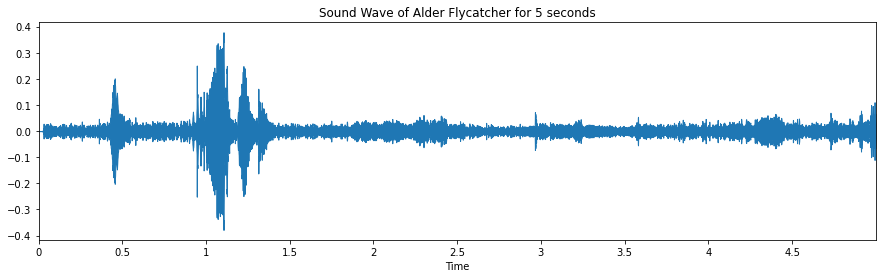

In [41]:
# plotting for 5 second sample 
plt.figure(figsize=(15,4))
plt.title('Sound Wave of Alder Flycatcher for 5 seconds', fontsize=12)
librosa.display.waveplot(y = audio_file[:5*sample_rate], sr = sample_rate)
plt.show()

##### Observation
Yeah, from the plot we observe that we are correct with our theory. Even the smaller samples have the birdcalls. As we know generally bird calls are short while their song is long which is also verified by this graph. Now, that we can have bird calls in smaller duration we can divide the files in 5 seconds sample each and check for the presence of the call and in this way we can have equal sample size for every bird's call which will help in data preparation during our model training. let us look at some more ways of processing audio and see we can find some more insights.

### 4.2.2 Zero Crossing Rate
* It is the rate at which the signal changes from positive to negative or vice versa i.e cross the horizontal axis.

In [42]:
# Total zero_crossings in aldfly call
zero_crossing = librosa.zero_crossings(samples, pad=False)
print("Zero crossings in aldfly sound call: ",sum(zero_crossing))

Zero crossings in aldfly sound call:  237662


### 4.2.3 Harmonics and Perceptrual 

* Harmonics are characteristichs that represent the sound *color*
* Perceptrual shock wave represents the sound *rhythm and emotion*

In [43]:
y_harm_aldfly, y_perc_aldfly = librosa.effects.hpss(samples)

plt.figure(figsize=(15, 4))
plt.plot(y_perc_aldfly)
plt.plot(y_harm_aldfly)
plt.legend(("Perceptrual", "Harmonics"))
plt.title("Harmonics and Perceptrual Plot for Alder Flycatcher call")
plt.show()

##### Observation
From the zero crossing rate feature we tried to observe the silence in the audio signal. When we keep pad to false we make sure that we have not introduced any silence values in order to make samples size equal or something. So, higher the zero crossing rate means lower is the amount of silence in the audio signal.

The other features perception and harmonics help in understanding the type of the sound wave. From the pitch feature analysis above we observed that most of audio files in the data have unsepecifed pitch, so to have a idea on this we plotted this graph. The pitch plays an important role in audio files we can increase or decrease the pitch as well as stretch frequency and time to produce similar sound waves with different audio quality which can help in data augumenataion which we will discuss later.

Coming to the plot the perceptual features helps in understanding the perception of the sound i.e we can see that it is in frequency range of human hearing as well as represents the sinosoidal form. While the harmonics represents the distortion in the sound freq at every time step. We observe that the distortion is not that much high.

Now, that we have learned various thing about the audio it is time to focus on feature extraction from these audio file which can help in classifying the bird's call and help us i achieveing our goal. So, one of the most important feature of audio is its represntation as image called spectrogram. let us have a look at that.

### 4.3 Spectrogram
We have seen 2D representation of audio in the above plot which does not describe anything more about the sound recording rather than its frequency and amplitude. so, to explore more about the audio files we came across another sound features called spectrogram. According to wikipedia, A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams. 

Spectrograms are used extensively in the fields of music, linguistics, sonar, radar, speech processing,seismology, and others. Spectrograms of audio can be used to identify spoken words phonetically, and to analyse the various calls of animals.

A spectrogram can be generated by an optical spectrometer, a bank of band-pass filters, by Fourier transform.

A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the colour or brightness.

As learned above, spectrogram can be generated by many methods and one of them is Fourier transform. let us learn more about fourier transform as it is widely used mathematical method to generate spectrogram from audio recordings.

In simple terms, sound is a sequence of vibrations over time which we have seen through above plot. Fourier transform is another mathematical way of representing sound.
In mathematics, a Fourier transform (FT) is a mathematical transform that decomposes a function (often a function of time, or a signal) into its constituent frequencies, such as the expression of a musical chord in terms of the volumes and frequencies of its constituent notes. The term Fourier transform refers to both the frequency domain representation and the mathematical operation that associates the frequency domain representation to a function of time.
So, let us see how FT affects the sound wave from below operations on the aldfly audio call.

https://musicinformationretrieval.com/stft.html

**Short-Time Fourier Transform**
Musical signals are highly non-stationary, i.e., their statistics change over time. It would be rather meaningless to compute a single Fourier transform over the entire song length.

The short-time Fourier transform (STFT) (Wikipedia; FMP, p. 53) is obtained by computing the Fourier transform for successive frames in a signal.

X(m,ω)=∑nx(n)w(n−m)e−jωn
 
As we increase  m , we slide the window function  w  to the right. For the resulting frame,  x(n)w(n−m) , we compute the Fourier transform. Therefore, the STFT  X  is a function of both time,  m , and frequency,  ω .

**librosa.stft computes a STFT. We provide it a frame size, i.e. the size of the FFT, and a hop length, i.e. the frame increment** let us see the implementation below.

In [178]:
# https://musicinformationretrieval.com/stft.html
hop_length = 512 # frame increment
n_fft = 2048 # frame size
X = np.abs(librosa.stft(samples, n_fft=n_fft, hop_length=hop_length))
X.shape

(1025, 5756)

In [192]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(X, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram of Alder Flycatcher call")
plt.show()

For real-valued signals, the Fourier transform is symmetric about the midpoint. Therefore, librosa.stft only retains one half of the output:
This STFT has 1025 frequency bins and 5756 frames in time.

**let me stop you there**

Before you go plotting and checking if you got a spectrogram of the audio file or not. `If you still do you will get the result as plotted in the above image. I know you cannot make much sense out of it. So, let us see what we can do to achieve more.`

In music processing, we often only care about the spectral magnitude and not the phase content.
And as defined above the spectrogram shows the the intensity of frequencies over time. A spectrogram is simply the squared magnitude of the STFT(X) which we calculated above:

S(m,ω)=|X(m,ω)|2

But there is one more thing the human perception of sound intensity is logarithmic in nature i.e we cannot visualise and make sense to a sound out of a certain frequency range. Therefore, we are often interested in the log amplitude.

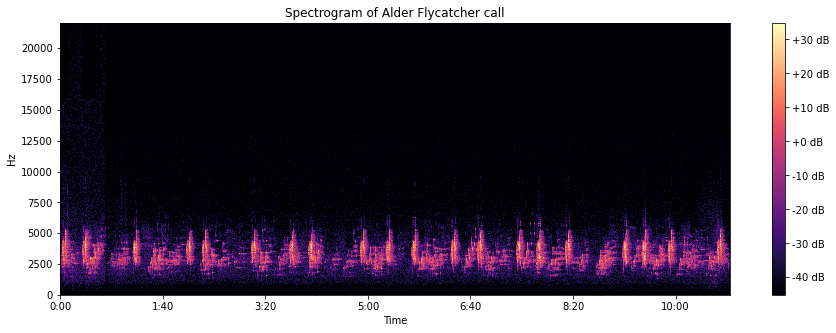

In [193]:
# transform axes to log scale using librosa amplitude_to_db function
spectrogram = librosa.amplitude_to_db(X)

# Now, we have spectrogram in mathematical form let us plot the spectrogram using librosa.display.specshow.
plt.figure(figsize=(15, 5))
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram of Alder Flycatcher call")
plt.show()

This is what a spectrogram is. we can see the call part of the audio as highlighted and rest are dark.

### 4.4 Mel Spectrogram
When we applied log transformation to the SFFT, we got the above spectrogram. So, how is this mel spectrogram different than that. Actually, The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis rather than log scale where the **Mel Scale**, mathematically speaking, is the result of some non-linear transformation of the frequency scale. 
We can use melspectrogram feature of librosa library to easily get this feature of the audio signals

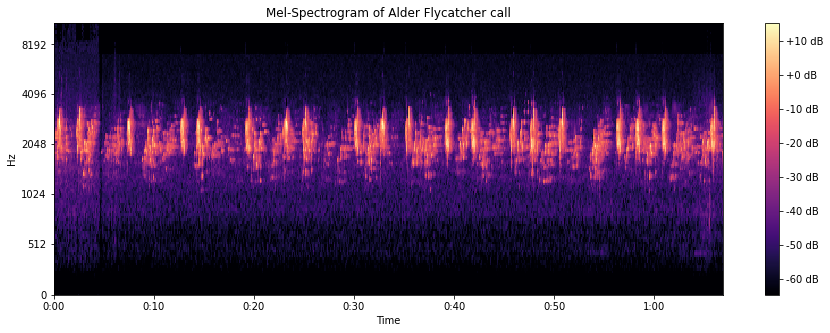

In [194]:
# getting mel spectrogram using librosa melspectrogram feature
mel_spectrogram = librosa.feature.melspectrogram(samples, sr=sample_rate, n_fft=n_fft, hop_length=hop_length)

# transforming to mel scale
mel_scale = librosa.power_to_db(abs(mel_spectrogram))

# Now, we have spectroagram in mathematical form let us plot the spectrogram using librosa.display.specshow.
plt.figure(figsize=(15, 5))
librosa.display.specshow(mel_scale, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-Spectrogram of Alder Flycatcher call")
plt.show()

We can clearly see the changes from the previous plot. Here, we have used mel scale for y-axis rather than linear as used in the previous approach. Using **y_axis=mel** plots the y-axis on the mel scale which is similar to the  log(1+f)  function:
    m = 2595log10(1+f/700)

##### Observation
We have learnt about quite a features like fourier transform, spectrogram and mel_spectrogram. It is now time to understand how can be use these features properly.

From the pre-processing part we have found that 5 seconds samples contain the bird's call. So, let us go ahead and check the spectrogram features for these samples and alos verify some other parameters like frequency and window length etc.

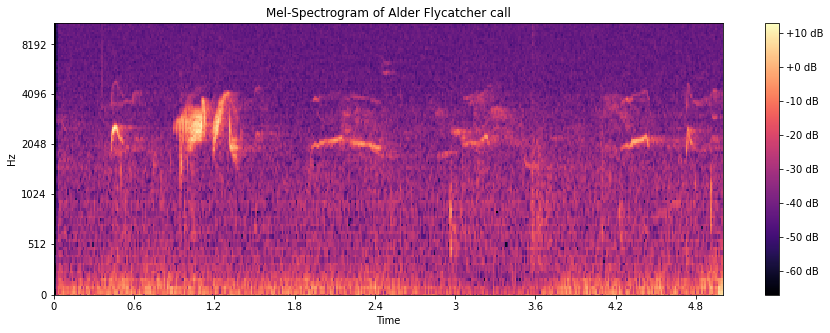

In [44]:
n_fft=1024
hop_length=512
sample_rate = 44100

mel = librosa.feature.melspectrogram(audio_file[:sample_rate*5], 44100, n_mels=128, n_fft=1024, hop_length=512, fmin=20, fmax=16000)
# transforming to mel scale
mel_scale = librosa.power_to_db(abs(mel))

plt.figure(figsize=(15, 5))
librosa.display.specshow(mel_scale, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-Spectrogram of Alder Flycatcher call")
plt.show()

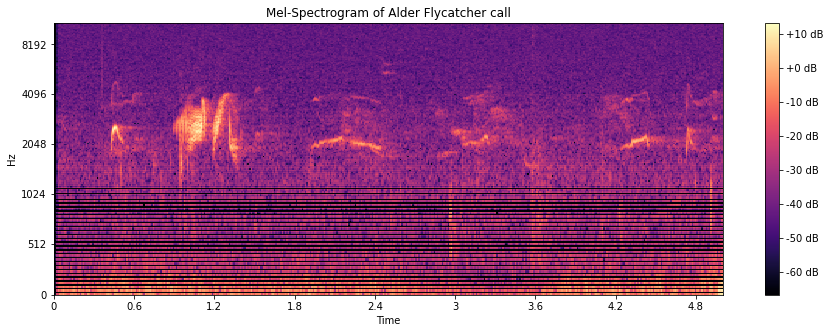

In [45]:
n_fft=1024
hop_length=512
sample_rate = 44100
mel = librosa.feature.melspectrogram(audio_file[:44100*5], 44100, n_mels=256, n_fft=1024, hop_length=512, fmin=20, fmax=16000)
# transforming to mel scale
mel_scale = librosa.power_to_db(abs(mel))

plt.figure(figsize=(15, 5))
librosa.display.specshow(mel_scale, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-Spectrogram of Alder Flycatcher call")
plt.show()

##### Observation
The above two plots are the mel-spectrogram feature for the 5 seconds audio samples. The parameters we used above like n_fft(window length) and hop length are referenced from the audio pre-processing paper and the parameters used above is found to be working best so, we plotted the final ones using them. 

Also, in the first plot we used n_mels=128 and in second one we used n_mels=256 while the frequency below 20Hz and above 16000Hz is discarded as this range is the human's hearing range. From the plotss above we see that the first graph looks good where the bright contrasting bell shape shows the presence of the birdcall. While the second plot looks same to first one but we have some lines and distortion in lower half part suggesting that the higher number of mels introduces the distortion in the image.

So, we can conclude that the spectrogram with n_fft=1024, hop_length=512, n_mels=128 and freq range of 20-16000Hz gives the best features for the audio and we have our bird's call properly represented.

I think we have learned quite a lot of features about an audio signal. Now, it is time to summarise what we learnt and how we can utilize them in our objective of solving this problem of classifying the birdcalls.For more features refer to:- http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/feature.html#spectral-features

## 5. Observation on EDA and FE
Let us summarise what we gathered from the data analysis and feature extraction part. From data analysis of the train data set we have gathered a lot of information about the recordings we have with us.
1. We have 264 unique bird species in our data.
2. 50% of the bird species have 100 recordings per bird while rest of them have recordings between 1 to 100 available to us.
3. Recordings contain bird call, songs and many different kind of bird sounds as well as background sounds.
4. Pitch and speed of the audio is not specified in the data for 90% of them.
5. 90% of the recordigs provided has been rated more than 3 where 1 being the least and 5 being the highest.
6. Most of the bird call were recorded in the Spring and Summer season of North America:- USA, Canada and Mexico, USA being the country where highest number of recordigns has been done for past 9 years from 2011 to 2019.
7. The minimum duration of the recorded audio is zero seconds while 85% of them having duration less than 100 seconds.
8. 99% of the recordings provided is of mp3 format with more than 55% of them having sampling rate of 44100 Hz.

Moving ahead let us see what we observed in FE part:-
1. librosa library is used to load and process the data
2. librosa load the sound as sequence of vibrations stored in form of ndarray and sample rate, the rate at which the sound is processed.
3. We have learned how to visualise sound wave in 2D representation with time on x-axis and amplitude of the sound on y-axis.
4. Using librosa we extracted many features from sound like zero crossing rate( the number of times the waves crossed horizontal x-axis) and for the Alder Flycatcher's call sound crossed the horizontal x-axis 431290 times.
5. We observed how to convert audio signals into image using spectrogram feature of the sound waves.
6. Fourier transform a mathematical way to convert sound wave from time domain to frequency domain  plays an important role in these feature generation.
7. Another important feature mel spectrogram is observed which is the same as spectrogram but is calculated on mel scale rather than a log scale. And provides more readable image than the previous as observed.
8. Features like harmonics and perceptual helped us in learning the pitch and color of the sound.
9. We learned that we can use 5 seconds sample of the audio file instead of using the whole audio at a time which can cause size mismatch for each file and we might need to put extra efforts in padding the sequence.
10. The 5 seconds sample is taken after analysing file for less than 5 seconds sample and found that 5 seconds is optimal duration and every audio conatins bird's call in this interval. So, we should not run into silence or noise sample only.
11. The mel-spectrogram with n_mels=128 and signal between 20-16000 Hz showed the best image feature of the 5 seconds sample audio and we observe the presence of the sound quite clearly.
12. The frequency range is decided from the harmonics and 2d-representation of the sound where we found that this range has minimum distortion.

## 6. Feature Encoding/Data Preparation
### 6.1 Splitting data into train and validation

In [25]:
# dataframe containg the path to the audio files and the class labels
# df_audio = train_df[['filename','filepath','duration','sampling_rate','ebird_code']]
df_audio = pd.read_csv('df_audio.csv')
# df_audio.to_csv('df_audio.csv',index=False)
df_audio.head(2)

filename                         filepath  duration sampling_rate  \
0  XC134874.mp3  train_audio/aldfly/XC134874.mp3        25    48000 (Hz)   
1  XC135454.mp3  train_audio/aldfly/XC135454.mp3        36    44100 (Hz)   

  ebird_code  
0     aldfly  
1     aldfly

In [84]:
#split the data into train and validation and save in X_train, X_cv, y_train, y_cv
#use stratify sampling,random state of 45 and validaton size of 20%
X_train, X_test, y_train, y_test = train_test_split(df_audio,df_audio.ebird_code,test_size=0.2, 
                                                    random_state=45,stratify=df_audio.ebird_code)

print("Training data: ",X_train.shape,y_train.shape)
print("Validataion data: ",X_test.shape,y_test.shape)

Training data:  (17100, 5) (17100,)
Validataion data:  (4275, 5) (4275,)


In [6]:
X_train.head()

filename                         filepath  duration sampling_rate  \
14151  XC465329.mp3  train_audio/osprey/XC465329.mp3        36    44100 (Hz)   
14723  XC454672.mp3  train_audio/pibgre/XC454672.mp3        15    48000 (Hz)   
14035  XC358544.mp3  train_audio/orcwar/XC358544.mp3        61    48000 (Hz)   
16425  XC145611.mp3  train_audio/robgro/XC145611.mp3        52    44100 (Hz)   
18291  XC182419.mp3  train_audio/stejay/XC182419.mp3         3    44100 (Hz)   

      ebird_code  
14151     osprey  
14723     pibgre  
14035     orcwar  
16425     robgro  
18291     stejay

In [7]:
bird_species_mapping = dict(zip(train_df['ebird_code'],train_df['species']))
# Integer coding the class labels
ebird_code_labeled = dict()
ebird_code_classes = dict()

ebird_code_labeled['nocall'] = 0
ebird_code_classes[0] = 'nocall'
for i, bird in enumerate(df_audio['ebird_code'].unique()):
    ebird_code_labeled[bird] = i+1
    ebird_code_classes[i+1] = bird
    
# pickle.dump((bird_species_mapping,ebird_code_labeled,ebird_code_classes), open('model_logs/bird_species_code.pkl','wb'))

### 6.2 Raw Data (Generating samples of 5 seconds)

In [45]:
# sampling audio to 5 seconds length
def raw_data(filename,bird_code,raw_df):
    sample_rate = 44100
    try:
        samples, sample_rate = librosa.load(filename,sr=44100)
    except:
        sound = AudioSegment.from_file(filename)
        samples = sound.get_array_of_samples()
        new_sound = sound._spawn(samples)
        samples = np.array(samples).astype(np.float32)

    samples, _ = librosa.effects.trim(samples)
    data_point_per_second = 10
    
    #Take 10 data points every second
    samples = samples[0::int(sample_rate/data_point_per_second)]
    #We normalize each sample before extracting 5s samples from it
    normalized_sample = sklearn.preprocessing.minmax_scale(samples, axis=0)
    
    #only take 5s samples and add them to the dataframe
    song_sample = []
    sample_length = 5*data_point_per_second
    for idx in range(0,len(normalized_sample),sample_length): 
        song_sample = normalized_sample[idx:idx+sample_length]
        if len(song_sample)>=sample_length:
            raw_df = raw_df.append({"song_samples":np.asarray(song_sample).astype(np.float32),
                                            "bird_code":ebird_code_labeled[bird_code]}, ignore_index=True)
    return raw_df

In [46]:
raw_df = pd.DataFrame(columns=["song_samples","bird_code"])
for i, row in tqdm(df_audio[['filepath','ebird_code']][12327:].iterrows()):
    raw_df = raw_data(row.filepath, row.ebird_code, raw_df)
    
raw_df.to_csv('raw_df.csv',index=False)

9048it [4:15:54,  1.70s/it]


### 6.3 Creating Spectrogram for 5 seconds sample and save as npz file with data and labels

In [8]:
# stacking the image to 3 channels for CNN models
def mono_to_color(X: np.ndarray, mean=None, std=None, norm_max=None, norm_min=None, eps=1e-6):
    """Code from https://www.kaggle.com/daisukelab/creating-fat2019-preprocessed-data"""
    # Stack X as [X,X,X]
    X = np.stack([X, X, X], axis=-1)

    # Standardize
    mean = mean or X.mean()
    X = X - mean
    std = std or X.std()
    Xstd = X / (std + eps)
    _min, _max = Xstd.min(), Xstd.max()
    norm_max = norm_max or _max
    norm_min = norm_min or _min
    if (_max - _min) > eps:
        # Normalize to [0, 255]
        V = Xstd
        V[V < norm_min] = norm_min
        V[V > norm_max] = norm_max
        V = 255 * (V - norm_min) / (norm_max - norm_min)
        V = V.astype(np.uint8)
    else:
        # Just zero
        V = np.zeros_like(Xstd, dtype=np.uint8)
    return V

In [ ]:
# sampling audio to 5 seconds length
def spectrogram_images(filename,bird_code):
    sample_rate = 44100
    try:
        samples, sample_rate = librosa.load(filename,sr=44100)
    except:
        sound = AudioSegment.from_file(filename)
        samples = sound.get_array_of_samples()
        new_sound = sound._spawn(samples)
        samples = np.array(samples).astype(np.float32)

    samples, _ = librosa.effects.trim(samples)
    
    #only take 5s samples and save them to the np array
    sample_length = 5*sample_rate
    X = np.abs(librosa.stft(samples[:44100*5], n_fft=1024, hop_length=512))
    spectrogram = librosa.amplitude_to_db(X)
    image = mono_to_color(spectrogram)

    res = cv2.resize(image, (224, 224))
    res = (res / 255.0).astype(np.float32)
    res = np.asarray(res)
    
    incep = cv2.resize(image, (299, 299))
    incep = (incep / 255.0).astype(np.float32)
    incep = np.asarray(incep)
    
    label = ebird_code_labeled[bird_code]
    
    return spectrogram,res,incep,label


def func(start,end,idx):
    labels = []
    img_res = []
    img_incep = []
    spec = []

    for i, row in X_train[['filepath','ebird_code']][start*idx:end*(idx+1)].iterrows():
        mel_spec,res,incep,label = spectrogram_images(row.filepath, row.ebird_code)
        spec.extend(mel_spec)
        img_res.append(res)
        img_incep.append(incep)
        labels.append(label)
    
    # stroing the data as npz file for easy access
#     np.savez_compressed('processed_data/VGG/STFT/train/images_data'+str(idx),a=spec,b=labels)
    np.savez_compressed('processed_data/ResNet/tr/images_data'+str(idx),a=img_res,b=labels)
    np.savez_compressed('processed_data/Inception/tr/images_data'+str(idx),a=img_incep,b=labels)
    np.savez_compressed('processed_data/spec_data/tr/images_data'+str(idx),a=spec,b=labels)
    
def func1(start,end,idx):
    labels = []
    img_res = []
    img_incep = []
    spec = []

    for i, row in X_cv[['filepath','ebird_code']][start*idx:end*(idx+1)].iterrows():
        mel_spec,res,incep,label = spectrogram_images(row.filepath, row.ebird_code)
        spec.extend(mel_spec)
        img_res.append(res)
        img_incep.append(incep)
        labels.append(label)
        
#     np.savez_compressed('processed_data/VGG/STFT/validation/images_data'+str(idx),a=spec,b=labels)    
    np.savez_compressed('processed_data/ResNet/val/images_data'+str(idx),a=img_res,b=labels)
    np.savez_compressed('processed_data/Inception/val/images_data'+str(idx),a=img_incep,b=labels)
    np.savez_compressed('processed_data/spec_data/val/images_data'+str(idx),a=spec,b=labels)

In [18]:
for i in tqdm(range(0,535,8)):
    if i != 528:
        p1 = multiprocessing.Process(target=func, args=(32,32,i))
        p2 = multiprocessing.Process(target=func, args=(32,32,i+1))
        p3 = multiprocessing.Process(target=func, args=(32,32,i+2))
        p4 = multiprocessing.Process(target=func, args=(32,32,i+3))
        p5 = multiprocessing.Process(target=func, args=(32,32,i+4))
        p6 = multiprocessing.Process(target=func, args=(32,32,i+5))
        p7 = multiprocessing.Process(target=func, args=(32,32,i+6))
        p8 = multiprocessing.Process(target=func, args=(32,32,i+7))

        p1.start()
        p2.start()
        p3.start()
        p4.start()
        p5.start()
        p6.start()
        p7.start()
        p8.start()

        p1.join()
        p2.join()
        p3.join()
        p4.join()
        p5.join()
        p6.join()
        p7.join()
        p8.join()
    else:
        p1 = multiprocessing.Process(target=func, args=(32,32,i))
        p2 = multiprocessing.Process(target=func, args=(32,32,i+1))
        p3 = multiprocessing.Process(target=func, args=(32,32,i+2))
        p4 = multiprocessing.Process(target=func, args=(32,32,i+3))
        p5 = multiprocessing.Process(target=func, args=(32,32,i+4))
        p6 = multiprocessing.Process(target=func, args=(32,32,i+5))
        p7 = multiprocessing.Process(target=func, args=(32,32,i+6))

        p1.start()
        p2.start()
        p3.start()
        p4.start()
        p5.start()
        p6.start()
        p7.start()

        p1.join()
        p2.join()
        p3.join()
        p4.join()
        p5.join()
        p6.join()
        p7.join()

100%|██████████| 67/67 [1:53:11<00:00, 101.37s/it]


In [52]:
for i in tqdm(range(0,134,8)):
    if i != 128:
        p1 = multiprocessing.Process(target=func1, args=(32,32,i))
        p2 = multiprocessing.Process(target=func1, args=(32,32,i+1))
        p3 = multiprocessing.Process(target=func1, args=(32,32,i+2))
        p4 = multiprocessing.Process(target=func1, args=(32,32,i+3))
        p5 = multiprocessing.Process(target=func1, args=(32,32,i+4))
        p6 = multiprocessing.Process(target=func1, args=(32,32,i+5))
        p7 = multiprocessing.Process(target=func1, args=(32,32,i+6))
        p8 = multiprocessing.Process(target=func1, args=(32,32,i+7))

        p1.start()
        p2.start()
        p3.start()
        p4.start()
        p5.start()
        p6.start()
        p7.start()
        p8.start()

        p1.join()
        p2.join()
        p3.join()
        p4.join()
        p5.join()
        p6.join()
        p7.join()
        p8.join()
    else:
        p1 = multiprocessing.Process(target=func1, args=(32,32,i))
        p2 = multiprocessing.Process(target=func1, args=(32,32,i+1))
        p3 = multiprocessing.Process(target=func1, args=(32,32,i+2))
        p4 = multiprocessing.Process(target=func1, args=(32,32,i+3))
        p5 = multiprocessing.Process(target=func1, args=(32,32,i+4))
        p6 = multiprocessing.Process(target=func1, args=(32,32,i+5))

        p1.start()
        p2.start()
        p3.start()
        p4.start()
        p5.start()
        p6.start()

        p1.join()
        p2.join()
        p3.join()
        p4.join()
        p5.join()
        p6.join()

100%|██████████| 1/1 [00:00<00:00, 1245.34it/s]

Done !


Spec images data:  (32, 224, 224, 3) (32, 1)
Spec data:  (128, 431) (1,)


<AxesSubplot:xlabel='Time', ylabel='Hz'>

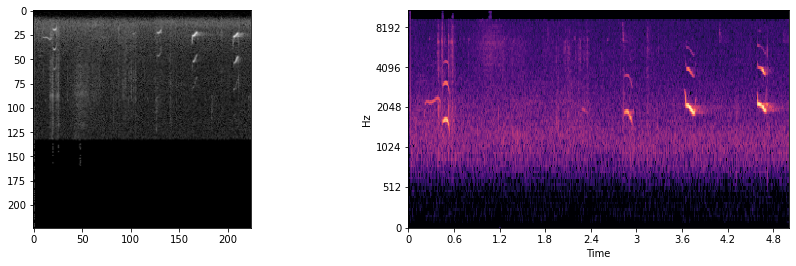

In [137]:
# checking the data after pre-processing
img = np.load('processed_data/VGG/STFT/train/images_data0.npz')
print("Spec images data: ",img['a'].shape,img['b'].shape)
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.imshow(img['a'][0])
# Checking the 5 seconds spectrogram generated
spec = np.load('processed_data/spec_data/train/images_data0.npz')
print("Spec data: ",spec['a'][0].shape,spec['b'][:1].shape)
plt.subplot(1,2,2)
librosa.display.specshow(spec['a'][0], sr=44100, hop_length=512, x_axis='time', y_axis='mel')

##### Observation
We have learnt how to load and extract feature for audio in last section so using that we are preparing our data here for the model training. Here, we have created two functions namely raw_data and spectrogram images which process the data into 5 seconds samples and 5 seconds spectrogram samples respectively. The first 5 seconds samples data is in shape of (5*samaple_rate,*) while the second one is in shape of (128,431) these samples can be reshaped according to the model needs.

While if we want to feed these spectrogram images to any CNN  model we will need to make it a 3 or 1-channel image i.e of the shape (128,451,3) or as you want to feed to your models. So, to do that we used mono-to-color function to stacke these images to 3-channels as you can see in the aboe plotted images and the printed shape. The previous shape of the data is (batch, 128, 451) and after reshaping it is  (batch,224,224,3)
The class labels have been integer encoded and stored separately as lables npz file for each sample data in the shape of (batch,).

Now, that we have prepared our data it is time to go for model training and observe the results.

## 7. Model Training
### 7.1 LSTM Networks 

In [141]:
# defining the metrics and callbacks
NUM_CLASSES = len(ebird_code_classes.keys())

# loss function to minimize
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction='none')

def loss_function(y_true, y_pred):
    loss_ = loss_object(y_true, y_pred)

    return tf.reduce_mean(loss_)

# def f1(y_true, y_pred, threshold=0.5, avg="samples"):
#     """
#     The f1 metric for the problem
#     Arguments:
#         truth {np array [N] or [N x C]} -- Ground truths
#         pred {np array [N x C]} -- Predicted probabilites
#     Keyword Arguments:
#         threshold {float} -- Threshold for classification (default: {0.5})
#         avg {str} -- How to perform average in the f1 score (default: {"samples"})
#     Returns:
#         float -- f1 score
#     """

#     if len(y_true.shape) == 1:
#         y_true = TARGETS[y_true]

#     y_pred = (y_pred > threshold).astype(int)

#     return f1_score(y_true, y_pred, average=avg)

# performance metric
fs = tfa.metrics.F1Score(num_classes=265,average="weighted",thresold=0.5)
acc = tf.keras.metrics.BinaryAccuracy(threshold=0.5)


def callbacks(log_file_path,model_path):
    # define callbacks for learning rate scheduling and best checkpoints saving
    log_dir1 = "models_multi_labels/logs/"+ log_file_path + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tbc1 = tf.keras.callbacks.TensorBoard(log_dir=log_dir1,histogram_freq=1, write_graph=True,write_grads=True)
    md = ModelCheckpoint('models_multi_labels/'+ model_path +'.h5', monitor='val_loss', save_best_only=True, mode='min')
    rl = ReduceLROnPlateau(monitor='val_loss',patience=5)
    es = EarlyStopping(monitor='val_loss', patience=8)

    callbacks = [tbc1, md, rl,es]
    
    return callbacks

In [19]:
def plot_summary(hist):
    """
    Function to plot the loss and accuracy per epoch
    """
    sns.set_style('darkgrid')
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Loss over epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')

    plt.subplot(1,2,2)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Accuracy over epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

In [17]:
# reading samples data set
raw_df = pd.read_csv('processed_data/raw_df.csv')
raw_df.head()

song_samples  bird_code
0  [0.3159763  0.33718204 0.3274445  0.28169334 0...          1
1  [0.36486864 0.5234837  0.32493782 0.5351601  0...          1
2  [0.7291047  0.21798171 0.31371492 0.22323129 0...          1
3  [0.29065722 0.3178071  0.2819947  0.31778836 0...          1
4  [0.31598428 0.33034799 0.3539     0.33742216 0...          1

In [12]:
song_samples = raw_df.song_samples
y = raw_df.bird_code

X = []
for samples in song_samples:
    a = ','.join([i.strip('[]') for i in samples.strip().split()])
    a = np.fromstring(a, dtype=np.float, sep=',' )
    X.append(a)

X = np.asarray(X)

# split the data into train and validation and save in X_train, X_cv, y_train, y_cv
# use stratify sampling,random state of 45 and validaton size of 20%
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=45, stratify=y)

print("Training data: ",X_tr.shape,y_tr.shape)
print("Validataion data: ",X_te.shape,y_te.shape)

Training data:  (183933, 50) (183933,)
Validataion data:  (45984, 50) (45984,)


In [13]:
sequence_length = 50
training_size = X_tr.shape[0]
validation_size = X_te.shape[0]

# Training set
X_tr = np.reshape(X_tr,(training_size,1,sequence_length))
y_tr = to_categorical(y_tr, num_classes=len(ebird_code_classes.keys()), dtype='float32' )

# Validation set
X_te = np.reshape(X_te,(validation_size,1,sequence_length))
y_te = to_categorical(y_te, num_classes=len(ebird_code_classes.keys()), dtype='float32')

print("Training data: ",X_tr.shape,y_tr.shape)
print("Validataion data: ",X_te.shape,y_te.shape)

Training data:  (183933, 1, 50) (183933, 265)
Validataion data:  (45984, 1, 50) (45984, 265)


In [14]:
input_layer = Input(shape=X_tr.shape[1:],name='input')
lstm_layer = LSTM(32, return_sequences=True, activation='tanh', recurrent_activation='sigmoid',
                  kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',name='lstm1')(input_layer)
bn1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, name='bn1')(lstm_layer)
lstm_2 = LSTM(32, activation='tanh', recurrent_activation='sigmoid', kernel_initializer='glorot_uniform', 
              recurrent_initializer='orthogonal', name='lstm2')(bn1)
dense1 = Dense(256, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(lstm_2)
dp = Dropout(0.3)(dense1)
output = Dense(NUM_CLASSES, activation="sigmoid")(dp)

model_lstm1 = Model(inputs=input_layer,outputs=output)
model_lstm1.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1, 50)]           0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 1, 32)             10624     
_________________________________________________________________
bn1 (BatchNormalization)     (None, 1, 32)             128       
_________________________________________________________________
lstm2 (LSTM)                 (None, 32)                8320      
_________________________________________________________________
dense1 (Dense)               (None, 256)               8448      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 265)              

In [2]:
# tf.keras.utils.plot_model(
#     model_lstm1, to_file='model_logs/model_plots/model_lstm1.png', show_shapes=True, show_layer_names=True,
#     rankdir='TB', expand_nested=False, dpi=96
# )

In [20]:
# Tuning the parmeters like optimizers, learning rate checking for overfitting/underfitting on a batch of data 
model_lstm1.compile(loss=loss_function, optimizer='sgd',metrics=[acc,fs])

model_lstm1.fit(X_tr[:32], y_tr[:32], epochs = 5, validation_data=(X_te[:32], y_te[:32]))

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 5.5771 - accuracy: 0.0000e+00 - f1_score: 0.0075 - val_loss: 5.5796 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 71ms/step - loss: 5.5770 - accuracy: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 5.5796 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 60ms/step - loss: 5.5717 - accuracy: 0.0312 - f1_score: 0.0312 - val_loss: 5.5795 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 69ms/step - loss: 5.5781 - accuracy: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 5.5795 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 60ms/step - loss: 5.5725 - accuracy: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 5.5794 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0000e+00


In [48]:
optim = tf.keras.optimizer.Adam(learning_rate=0.001)
callbacks = callbacks('fit1','raw_lstm')

model_lstm1.compile(loss=loss_function, optimizer=optim, metrics=[acc,fs])

hist1 = model_lstm1.fit(X_tr, y_tr, epochs = 20, batch_size = 32, validation_data=(X_te, y_te), 
                    callbacks=callbacks)

Epoch 1/20
   1/5748 [..............................] - ETA: 0s - loss: 4.5717 - accuracy: 0.0000e+00 - f1_score: 0.0000e+00WARNING:tensorflow:From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
5748/5748 [==============================] - 49s 8ms/step - loss: 4.3762 - accuracy: 0.1156 - f1_score: 0.1156 - val_loss: 4.3511 - val_accuracy: 0.1194 - val_f1_score: 0.1194
Epoch 2/20
5748/5748 [==============================] - 44s 8ms/step - loss: 4.3291 - accuracy: 0.1198 - f1_score: 0.1198 - val_loss: 4.3966 - val_accuracy: 0.1133 - val_f1_score: 0.1133
Epoch 3/20
5748/5748 [==============================] - 43s 8ms/step - loss: 4.2913 - accuracy: 0.1221 - f1_score: 0.1221 - val_loss: 4.3359 - val_accuracy: 0.1196 - val_f1_score: 0.1196
Epoch 6/20
5748/5748 [==========================

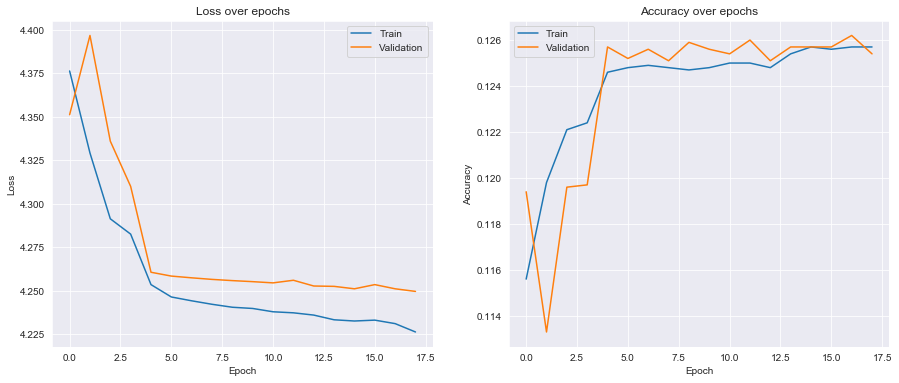

In [47]:
plot_summary(hist1)

In [4]:
Image('C:/Users/Kumar Gaurav/Pictures/Screenshots/Screenshot (134).png')

#### Observation:-
Here, we trained a simple a 3-layer LSTM network on the 5 seconds samples of the audio file loaded using the librosa library. We used various intialization and activation techniques for the model like glorot, he and relu, sigmoid etc. The model is trained with multiple optimizers like sgd, adam, rmsprop etc. and the best performing one is kept and finally trained. We used batch normalization and dropout between layers to reduce overfitting while training. Various callbacks like modelcheckpoint, earlystopping and reduceLR are used to have proper control during the trainig of the model. We also used tensorboard plot to track the gradients and performance of the model each epochs.

The model is trained for 20 epochs with adam optimizer and learning rate 0.01 which is found to be working best among all the other parameters in previous trainings. We used the weighted f1-score and averaged binary cross-entropy loss as metrics for the model as we have multi-label outputs. The result found at the end of the trainig is 0.12 f1-score which is better than nothing so, let us go ahead and experiment with some more models and check the performance.

#### 7.1.2 LSTM on sampled spectrogram

In [158]:
# https://stackoverflow.com/questions/53788434/training-a-keras-model-from-batches-of-npy-files-using-generator
# https://stackoverflow.com/questions/51697727/how-to-feed-multiple-numpy-arrays-to-a-deep-learning-network-in-keras
# https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly

class DataGenerator(tf.keras.utils.Sequence):

    def __init__(self, dir_path, file_list):
        """Constructor can be expanded,
           with batch size, dimentation etc.
        """
        self.file_list = file_list
        self.dir_path = dir_path
        self.on_epoch_end()

    def __len__(self):
        'Take all batches in each iteration'
        return int(len(self.file_list))

    def __getitem__(self, index):
        'Get next batch'
        # Generate indexes of the batch
        indexes = self.indexes[index:(index+1)]

        # single file
        file_list_temp = [self.file_list[k] for k in indexes]

        # Set of X_train and y_train
        X, y = self.__data_generation(file_list_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.file_list))

    def __data_generation(self, file_list_temp):
        'Generates data containing batch_size samples'
#         data_loc = "processed_data/spec_data/train/"
        # Generate data
        for ID in file_list_temp:
            x_file_path = os.path.join(self.dir_path, ID)
            data = np.load(x_file_path)

            # Store sample
            X = data['a']
            # Store class
            y = data['b']
            y = to_categorical(y,num_classes=265)

        return X, y

In [149]:
# train set
train_dir_path = "processed_data/spec_norm/train/"
train_files_path = os.listdir(train_dir_path)
train_gen = DataGenerator(train_dir_path, train_files_path)

# test set
test_dir_path = "processed_data/spec_norm/validation/"
test_files_path = os.listdir(test_dir_path)
test_gen = DataGenerator(train_dir_path, test_files_path)

In [17]:
# lstm for spectrogram data
input_layer = Input(shape=train_gen[0][0].shape[1:])
lstm_layer1 = LSTM(32, return_sequences=True, activation='tanh', recurrent_activation='sigmoid',
                  kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',name='lstm1')(input_layer)
lstm_layer2 = LSTM(32, return_sequences=True, activation='tanh', recurrent_activation='sigmoid',
                  kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',name='lstm2')(lstm_layer1)
average = tf.keras.layers.GlobalAveragePooling1D()(lstm_layer2)
layer_1 = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(average)
dropout = Dropout(rate=0.2)(layer_1)
output = Dense(NUM_CLASSES, activation='sigmoid')(dropout)

model_lstm2 = Model(inputs=input_layer,outputs=output)
model_lstm2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 50)]         0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 128, 32)           10624     
_________________________________________________________________
lstm2 (LSTM)                 (None, 128, 32)           8320      
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense1 (Dense)               (None, 512)               16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 265)              

In [39]:
optim = tf.keras.optimizer.Adam(learning_rate=0.001)
callbacks = callbacks('fit2','spec_lstm')

model_lstm2.compile(loss=loss_function, optimizer=optim, metrics=[acc,fs])

hist2 = model_lstm2.fit(train_gen, epochs=10, validation_data=test_gen, steps_per_epoch=len(train_gen), callbacks=callbacks)

Epoch 1/10
535/535 [==============================] - 1728s 3s/step - loss: 3.4674 - accuracy: 0.2095 - f1_score: 0.2096 - val_loss: 3.4201 - val_accuracy: 0.2099 - val_f1_score: 0.2099
Epoch 2/10
535/535 [==============================] - 1745s 3s/step - loss: 3.3750 - accuracy: 0.2126 - f1_score: 0.2126 - val_loss: 3.3481 - val_accuracy: 0.2138 - val_f1_score: 0.2138
Epoch 3/10
535/535 [==============================] - 1759s 3s/step - loss: 3.3186 - accuracy: 0.2186 - f1_score: 0.2186 - val_loss: 3.3198 - val_accuracy: 0.2189 - val_f1_score: 0.2189
Epoch 4/10
535/535 [==============================] - 1729s 3s/step - loss: 3.2922 - accuracy: 0.2220 - f1_score: 0.2220 - val_loss: 3.3090 - val_accuracy: 0.2223 - val_f1_score: 0.2223
Epoch 5/10
535/535 [==============================] - 1730s 3s/step - loss: 3.2810 - accuracy: 0.2217 - f1_score: 0.2217 - val_loss: 3.2935 - val_accuracy: 0.2218 - val_f1_score: 0.2218
Epoch 6/10
535/535 [==============================] - 1742s 3s/step - 

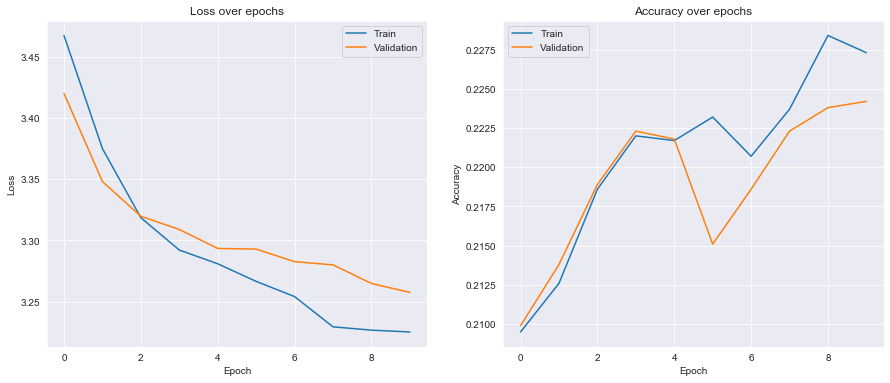

In [38]:
plot_summary(hist2)

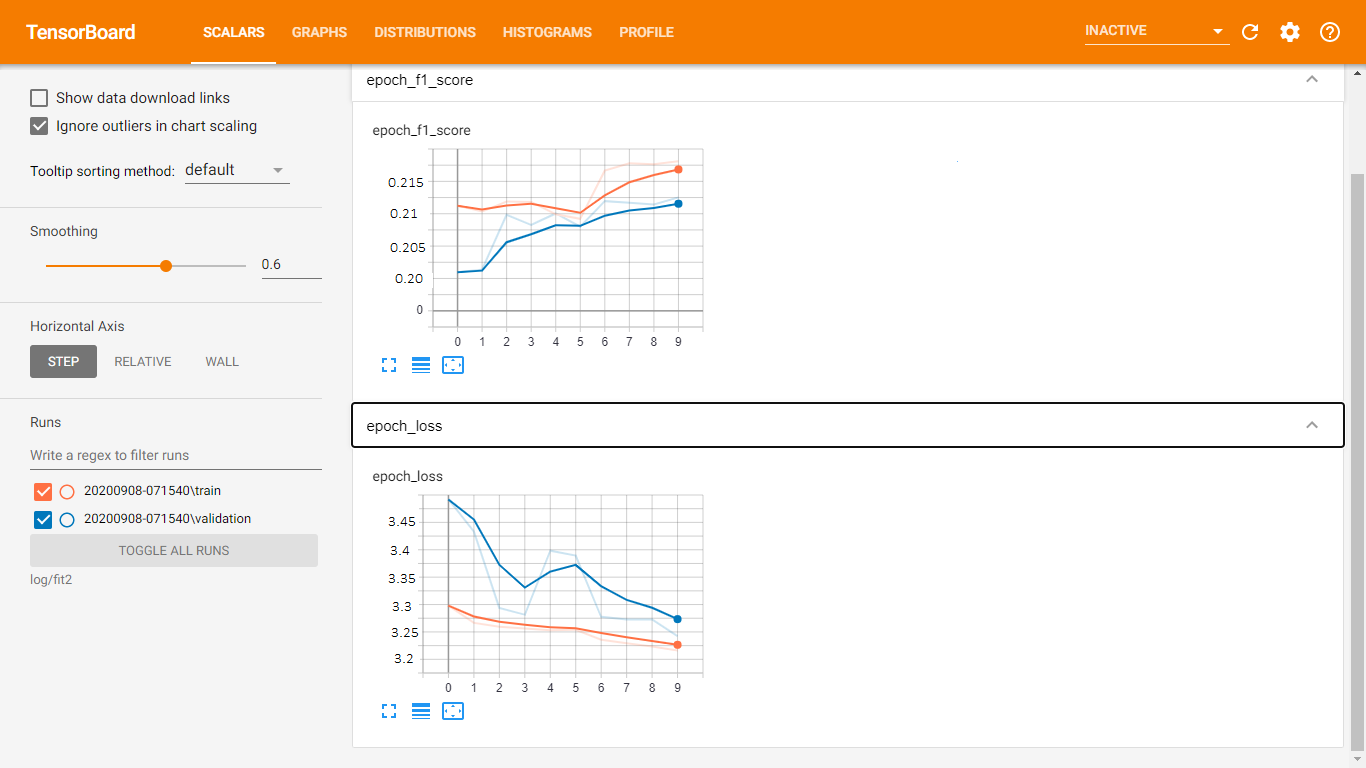

In [5]:
# tf.keras.utils.plot_model(
#     model_lstm2, to_file='model_logs/model_plots/model_lstm2.png', show_shapes=True, show_layer_names=True,
#     rankdir='TB', expand_nested=False, dpi=96
# )
Image('C:/Users/Kumar Gaurav/Pictures/Screenshots/log2.png')

#### Observation:-
As learned from previous model, we still go with LSTM models but changed some layers in this model. Also, instead of taking raw data as input we decided to go with spectrogram features extracted from the audios while processing. So, now the input data to the model is spectrogramns generated for 5 seconds sample for which 50 samples taken at a time of shape (batch, 128, 50) and output is 265 class sigmoid layer to get probability for each class.
We tweaked the model parameters and tuned them using one batch of the data. From intializations, activations to optimizers and learning rate we tuned them on one batch of spectrogram data and kept the best values. 

The best intializations is found to be glorat with relu actiations and adam optimizer with 0.01 learning rate. The categorical crossentropy as loss and f1 as performance metric is used for evaluation of the model. Now, for training we have observed that the spectrograms are stored as batched numpy files with labels so we use data generator technique to load these data. The training data is loaded as training generator and validation as validation generator.
The model is trained with best parameters as well as regularization introduced between layers like batch normalization and dropout with whole training data and the results are observed. Various callbacks like modelcheckpoint to resume training from any checkpoint, early stopping , reduceLR are used to keep track of the training. The results obtained is surely better than previous model. We have achieved quite good result here from the previous model. let us train this model again with more data and see if we can do any better.

#### 7.1.3 LSTM on spectrogram data

In [152]:
# train set
train_dir_path = "processed_data/spec_data/train/"
train_files_path = os.listdir(train_dir_path)
train_gen = DataGenerator(train_dir_path, train_files_path)

# test set
test_dir_path = "processed_data/spec_data/validation/"
test_files_path = os.listdir(test_dir_path)
test_gen = DataGenerator(train_dir_path, test_files_path)

In [24]:
# lstm for spectrogram data
input_layer = Input(shape=train_gen[0][0].shape[1:])
lstm_layer1 = LSTM(32, return_sequences=True, activation='tanh', recurrent_activation='sigmoid',
                  kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',name='lstm1')(input_layer)
bn1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, name='bn1')(lstm_layer1)
lstm_layer2 = LSTM(16, return_sequences=True, activation='tanh', recurrent_activation='sigmoid',
                  kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',name='lstm2')(bn1)
average = tf.keras.layers.GlobalAveragePooling1D()(lstm_layer2)
bn2 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, name='bn2')(average)
layer_1 = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(bn2)
dropout = Dropout(rate=0.2)(layer_1)
output = Dense(NUM_CLASSES,activation='sigmoid')(dropout)

model_lstm3 = Model(inputs=input_layer,outputs=output)
model_lstm3.summary()

Model: "functional_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 431)]        0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 128, 32)           59392     
_________________________________________________________________
bn1 (BatchNormalization)     (None, 128, 32)           128       
_________________________________________________________________
lstm2 (LSTM)                 (None, 128, 16)           3136      
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
bn2 (BatchNormalization)     (None, 16)                64        
_________________________________________________________________
dense1 (Dense)               (None, 512)              

In [46]:
optim = tf.keras.optimizer.Adam(learning_rate=0.001)
callbacks = callbacks('fit3','spec_norm_lstm')

model_lstm3.compile(loss=loss_function, optimizer=optim, metrics=[acc,fs])

hist3 = model_lstm3.fit(train_gen, epochs=10, validation_data=test_gen, steps_per_epoch=len(train_gen),
                 callbacks=callbacks)

Epoch 1/10
535/535 [==============================] - 614s 1s/step - loss: 3.4960 - accuracy: 0.2998 - f1_score: 0.3013 - val_loss: 3.7837 - val_accuracy: 0.3048 - val_f1_score: 0.3048
Epoch 2/10
535/535 [==============================] - 473s 884ms/step - loss: 3.4329 - accuracy: 0.3123 - f1_score: 0.3123 - val_loss: 3.6663 - val_accuracy: 0.3051 - val_f1_score: 0.3051
Epoch 3/10
535/535 [==============================] - 472s 882ms/step - loss: 3.4190 - accuracy: 0.3135 - f1_score: 0.3135 - val_loss: 3.4874 - val_accuracy: 0.3119 - val_f1_score: 0.3119
Epoch 4/10
535/535 [==============================] - 470s 879ms/step - loss: 3.4127 - accuracy: 0.3135 - f1_score: 0.3135 - val_loss: 3.4432 - val_accuracy: 0.3106 - val_f1_score: 0.3106
Epoch 5/10
535/535 [==============================] - 470s 879ms/step - loss: 3.4057 - accuracy: 0.3219 - f1_score: 0.3219 - val_loss: 3.4965 - val_accuracy: 0.3120 - val_f1_score: 0.3120
Epoch 6/10
535/535 [==============================] - 503s 940m

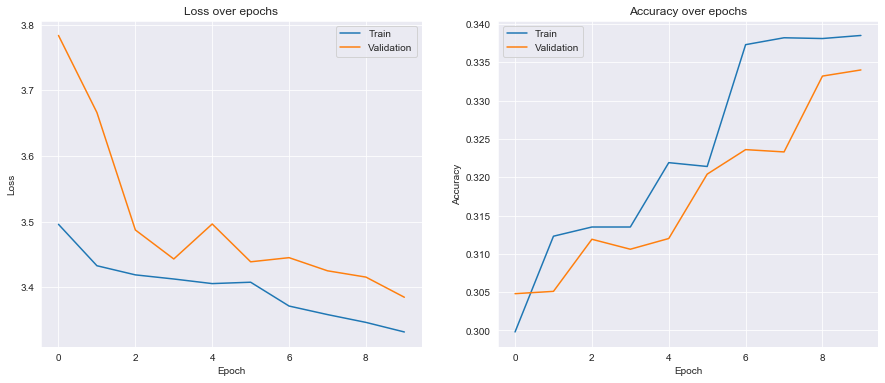

In [45]:
plot_summary(hist3)

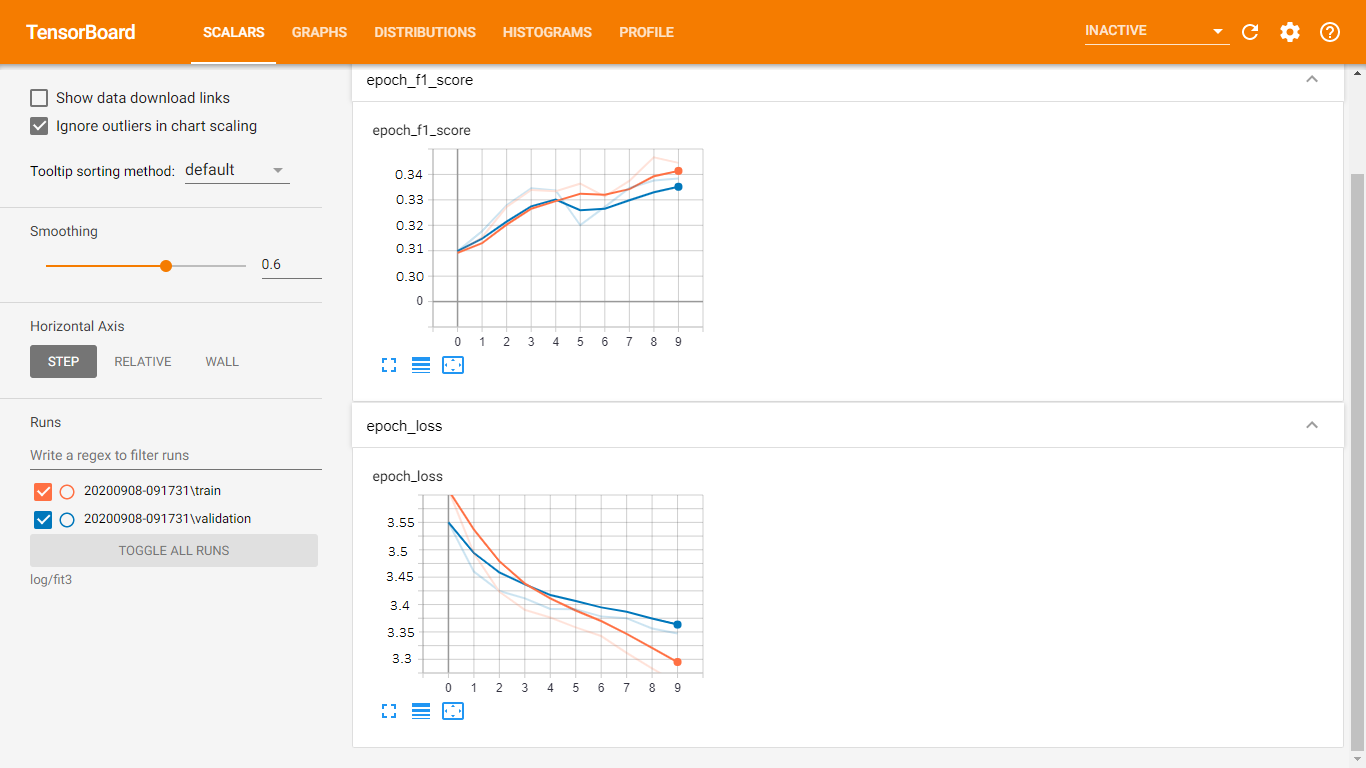

In [6]:
# tf.keras.utils.plot_model(
#     model_lstm3, to_file='model_logs/model_plots/model_lstm3.png', show_shapes=True, show_layer_names=True,
#     rankdir='TB', expand_nested=False, dpi=96
# )
Image('C:/Users/Kumar Gaurav/Pictures/Screenshots/log3.png')

#### Observation:-
In the previous approach we used LSTM network on spectrogram data but only for 50 samples per 5 seconds sample and found that we achived better results. So, in this model we decided to go with full spectrogram for 5 seconds sample of the audio file. We tried the same network with small change in the input layer to shape (None, 128, 451). The model is trained in batch of 10 epochs each for around 5 times and results is observed. We used reduceLRonplateau callback to track the learning rate while training, we used other callbacks too to keep an eye on the training. The resuls obtained is better than the previous one but we don't see any significant improvement. So, let us experiment with some different architectures.

### 7.2 CNN Models 
#### 7.2.1 ResNets50

In [159]:
# train set
train_dir_path = "processed_data/ResNet/tr/"
train_files_path = os.listdir(train_dir_path)
train_gen_res = DataGenerator(train_dir_path, train_files_path)

# test set
test_dir_path = "processed_data/ResNet/val/"
test_files_path = os.listdir(test_dir_path)
test_gen_res = DataGenerator(train_dir_path, test_files_path)

In [143]:
# ResNet50 for spectrogram images
layer_1 = ResNet50(include_top=False,weights="imagenet",input_shape=(224,224,3))
layer_1.trainable = False
average = tf.keras.layers.GlobalAveragePooling2D()(layer_1.output)
dense = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(average)
output = Dense(NUM_CLASSES, activation='sigmoid')(dense)

model_res50 = Model(inputs=layer_1.input,outputs=output)
model_res50.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_16[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________

In [34]:
optim = tf.keras.optimizer.Adam(learning_rate=0.001)
callbacks = callbacks('fit4','resnet50')

model_res50.compile(loss=loss_function, optimizer=optim, metrics=[acc,fs])

hist4 = model_res50.fit(train_gen_res, epochs=10, steps_per_epoch=len(train_gen_res), validation_data=test_gen_res,
                        callbacks=callbacks)

Epoch 1/5
535/535 [==============================] - 9069s 17s/step - loss: 2.6664 - accuracy: 0.4071 - f1_score: 0.4071 - val_loss: 2.6304 - val_accuracy: 0.4094 - val_f1_score: 0.4094 
Epoch 2/5
535/535 [==============================] - 9078s 17s/step - loss: 2.5995 - accuracy: 0.4110 - f1_score: 0.4110 - val_loss: 2.5684 - val_accuracy: 0.4115 - val_f1_score: 0.4115 
Epoch 3/5
535/535 [==============================] - 9090s 17s/step - loss: 2.5730 - accuracy: 0.4201 - f1_score: 0.4201 - val_loss: 2.5712 - val_accuracy: 0.4258 - val_f1_score: 0.4258 
Epoch 4/5
535/535 [==============================] - 9089s 17s/step - loss: 2.5617 - accuracy: 0.4418 - f1_score: 0.4418 - val_loss: 2.5770 - val_accuracy: 0.4326 - val_f1_score: 0.4326 
Epoch 5/5
535/535 [==============================] - 9090s 17s/step - loss: 2.5607 - accuracy: 0.4477 - f1_score: 0.4477 - val_loss: 2.5682 - val_accuracy: 0.4386 - val_f1_score: 0.4386 


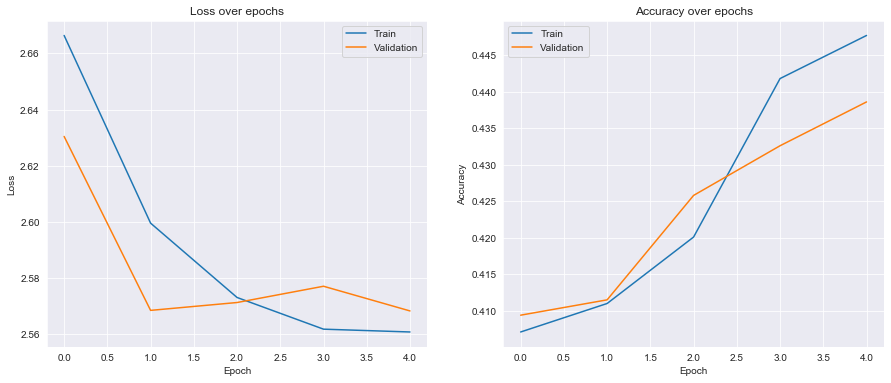

In [33]:
plot_summary(hist4)

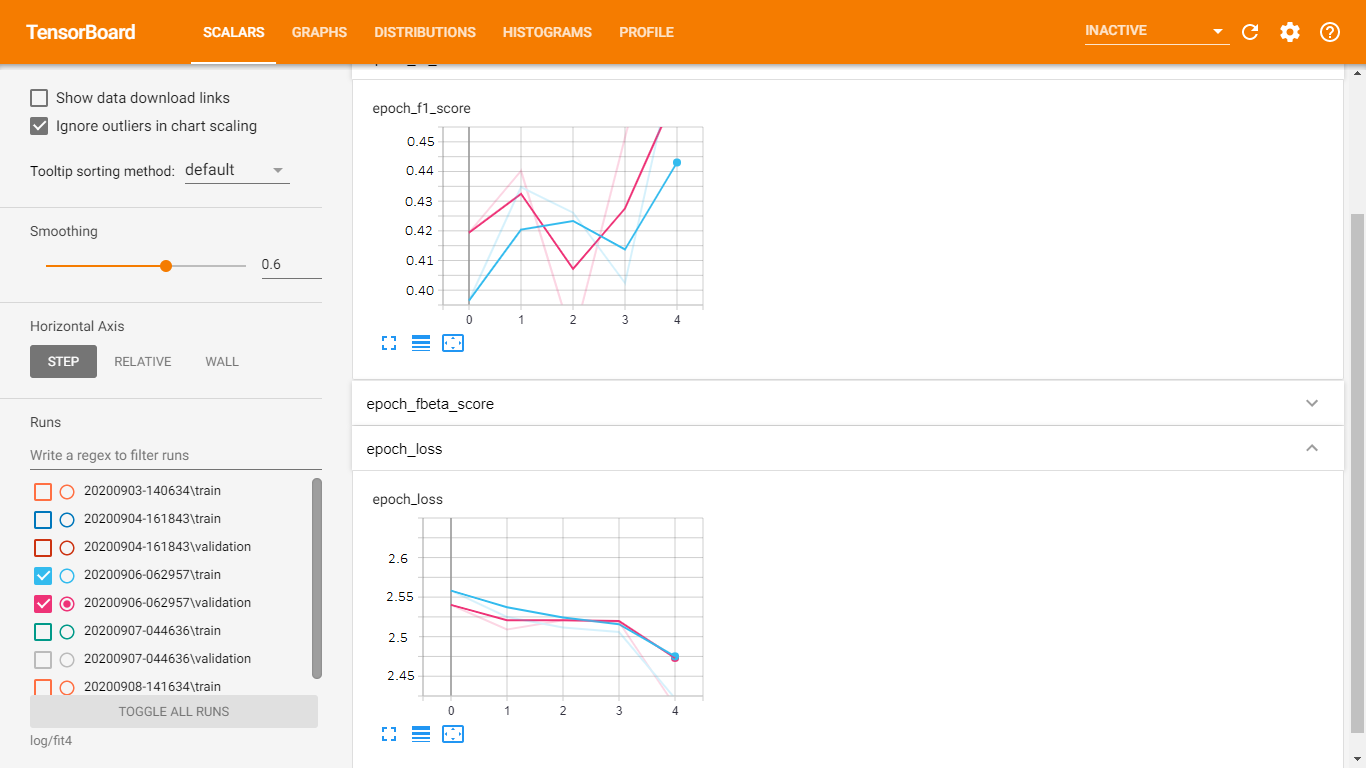

In [7]:
Image('C:/Users/Kumar Gaurav/Pictures/Screenshots/Screenshot (132).png')

#### Observation:-
For the above trained models we observed that the sequential architectural models are doing good but not performing well as expected so, we thought of trying the convolution architectures. Instead of developing the architectures from scratch and also limitation of the machine we used pre-trained resnet-50 model as feature extractor and then trained simple neural network to get the output. At the end of last features extractor layer of resnet we used globalaverage pooling layer and then added a dense layer and a dropout layer and at last used another dense layer to classify the outputs.

The spectrograms is resized and stacked over each other using the function mono_to_color defined above to get the image of shape (224,224,3) wwhich is fed into the resnet network.
We used the pre-trained weights for the entire model except the last few layers we added and trained only those layers during the model training.

The model is trained in batches of 5 epochs at a time due to large epoch time and machine limitations. We used similar metrics as previous models in this model as well while we tried training with sgd, rmsprop and adam optimizers and the best perfroming one adam is kept here as the final training optimizer. Various callbacks similar to previous models are used to keep track of the training. As observed from the results, we found that the CNN models are obviously performing better than the LSTM models. We achieved around 0.42 f1-score which is the best of the architectures till now. We found that CNN networks are working well so let us try some more CNN architectures.

#### 7.2.2 InceptionV3

In [145]:
# Inceptionv3 trained on imagenet for spectrogram images
top_layers = InceptionV3(include_top=False, weights="imagenet",input_shape=(299,299,3))
top_layers.trainable = False
average = GlobalAveragePooling2D()(top_layers.output)
dense = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(average)
output = Dense(NUM_CLASSES,activation='sigmoid')(dense)

model_inceptionv3 = Model(inputs=top_layers.input,outputs=output)
model_inceptionv3.summary()

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_454 (Conv2D)             (None, 149, 149, 32) 864         input_17[0][0]                   
__________________________________________________________________________________________________
batch_normalization_450 (BatchN (None, 149, 149, 32) 96          conv2d_454[0][0]                 
__________________________________________________________________________________________________
activation_450 (Activation)     (None, 149, 149, 32) 0           batch_normalization_450[0][0]    
______________________________________________________________________________________

In [163]:
# train set
train_dir_path = "processed_data/Inception/tr/"
train_files_path = os.listdir(train_dir_path)
train_gen_incep = DataGenerator(train_dir_path, train_files_path)

# test set
test_dir_path = "processed_data/Inception/val/"
test_files_path = os.listdir(test_dir_path)
test_gen_incep = DataGenerator(train_dir_path, test_files_path)

In [30]:
optim = tf.keras.optimizer.Adam(learning_rate=0.001)
callbacks = callbacks('fit5','inceptionv3')

model_inceptionv3.compile(loss=loss_function, optimizer=optim, metrics=[acc,fs])

hist5 = model_inceptionv3.fit(train_gen_incep, epochs=5, steps_per_epoch=len(train_gen_incep), validation_data = test_gen_incep,
                              callbacks=callbacks)

Epoch 1/5
535/535 [==============================] - 6095s 11s/step - loss: 1.9385 - accuracy: 0.5299 - f1_score: 0.5299 - val_loss: 1.9113 - val_accuracy: 0.5278 - val_f1_score: 0.5278 
Epoch 2/5
535/535 [==============================] - 6181s 12s/step - loss: 1.9119 - accuracy: 0.5317 - f1_score: 0.5317 - val_loss: 1.9047 - val_accuracy: 0.5391 - val_f1_score: 0.5391 
Epoch 3/5
535/535 [==============================] - 6181s 12s/step - loss: 1.8919 - accuracy: 0.5417 - f1_score: 0.5417 - val_loss: 1.9047 - val_accuracy: 0.5423 - val_f1_score: 0.5423 
Epoch 4/5
535/535 [==============================] - 6095s 11s/step - loss: 1.8985 - accuracy: 0.5599 - f1_score: 0.5599 - val_loss: 1.8988 - val_accuracy: 0.5578 - val_f1_score: 0.5578 
Epoch 5/5
535/535 [==============================] - 6181s 12s/step - loss: 1.8919 - accuracy: 0.5577 - f1_score: 0.5577 - val_loss: 1.8904 - val_accuracy: 0.5511 - val_f1_score: 0.5511 


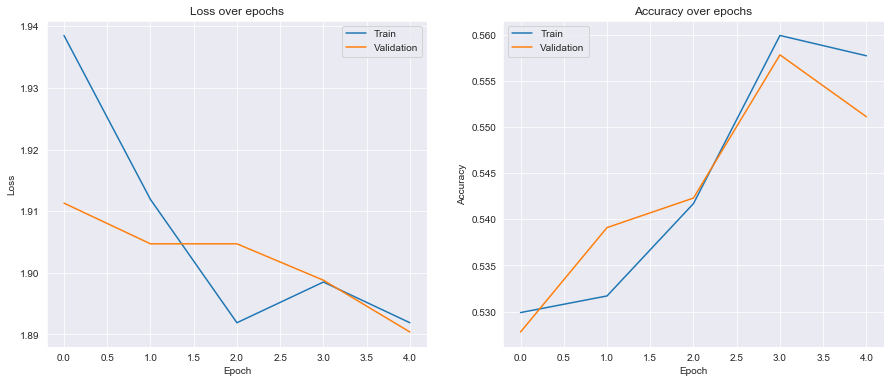

In [29]:
plot_summary(hist5)

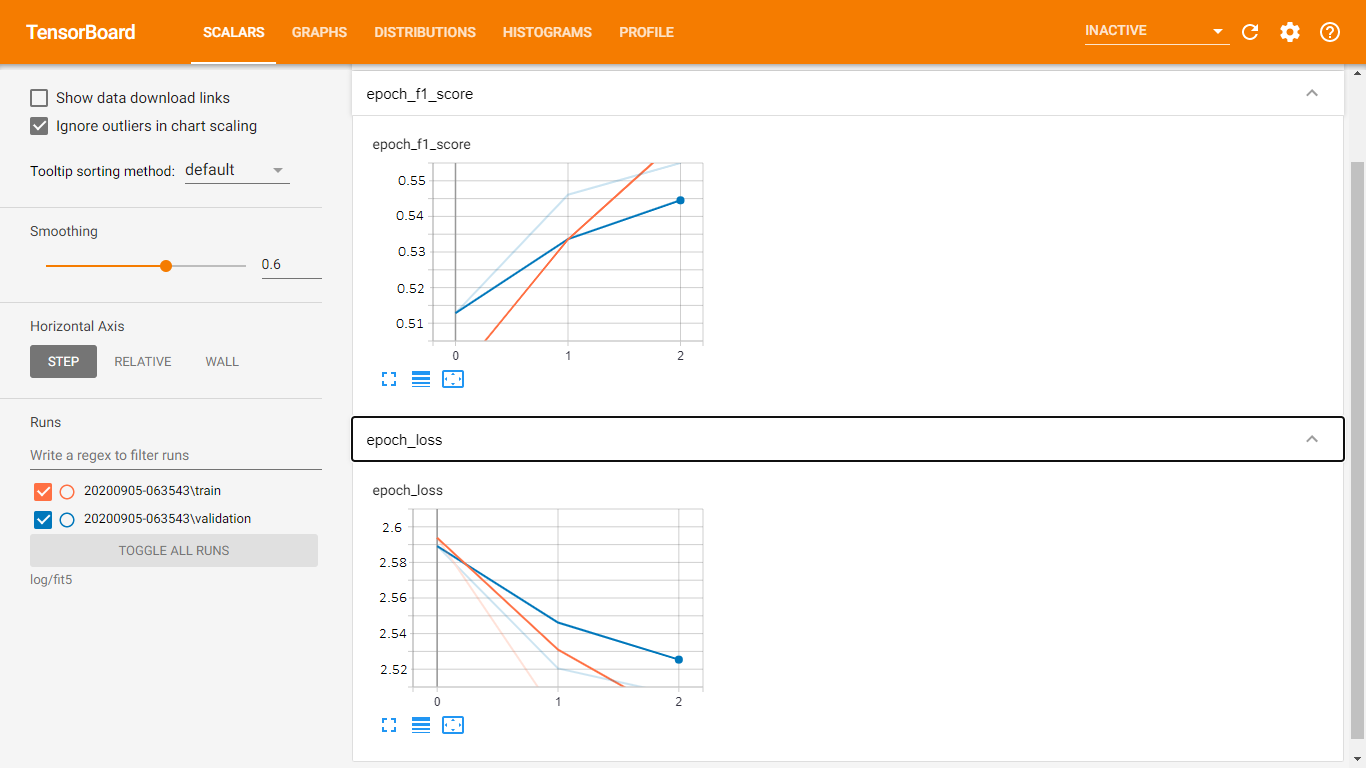

In [8]:
Image('C:/Users/Kumar Gaurav/Pictures/Screenshots/Screenshot (133).png')

#### Observation:-
From the results shown by resnet50 model, we found that cnn models are working better in this context so, in order to achieve good results we decided to experiment with another CNN based architecture i.e InceptionV3. Here, I tried the famous Inceptionv3 CNN model trained for 1000 class image classification as feature extractor and then used it to classify our spectrogram images of the birdcalls to classify it to 265 different bird species. Now, the input spectrograms are resized and stacked to make it of the shape (299,299,3).  The training is done similarly to resnet models in batches of epochs as epoch times are long and machine limitations. We used various callbacks to track the training, multiple training paradigms are tried from various optimizers to learning rate the best among them is found to be adam with 0.001 learning rate where the learning rate is reduced by 10% if training reaches a stalemate.

As observed from the results we found that this architecture is found to be performing better than the previous one and also achieved best results among them with around 0.56 f1-score. From this we can conclude that the complex and deep CNN architectures are performing well so we decide to use more dense CNN architectures and see we do any better or worse.

#### 7.2.3 DenseNet

In [113]:
# Dense Block
def denseblock(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    temp = input
    for _ in range(l): 
        BatchNorm = tf.keras.layers.BatchNormalization()(temp)
        relu = tf.keras.layers.Activation('relu')(BatchNorm)
        Conv2D_3_3 = tf.keras.layers.Conv2D(int(num_filter*compression), (3,3), use_bias=False ,padding='same')(relu)
        # Conv2D_3_3 = layers.SeparableConv2D(int(num_filter*compression), (3,3), use_bias=False ,padding='same')(relu)
        if dropout_rate>0:
            Conv2D_3_3 = tf.keras.layers.Dropout(dropout_rate)(Conv2D_3_3)
        concat = tf.keras.layers.Concatenate(axis=-1)([temp,Conv2D_3_3])
        
        temp = concat
        
    return temp

## transition Block
def transition(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    BatchNorm = tf.keras.layers.BatchNormalization()(input)
    relu = tf.keras.layers.Activation('relu')(BatchNorm)
    Conv2D_BottleNeck = tf.keras.layers.Conv2D(int(num_filter*compression), (1,1), use_bias=False ,padding='same')(relu)
    if dropout_rate>0:
         Conv2D_BottleNeck = tf.keras.layers.Dropout(dropout_rate)(Conv2D_BottleNeck)
    avg = tf.keras.layers.AveragePooling2D(pool_size=(2,2))(Conv2D_BottleNeck)
    return avg

#output layer
def output_layer(input,num_classes):
    global compression
    BatchNorm = tf.keras.layers.BatchNormalization()(input)
    relu = tf.keras.layers.Activation('relu')(BatchNorm)
    AvgPooling = tf.keras.layers.AveragePooling2D(pool_size=(2,2))(relu)
    fc1Conv1 = Conv2D(filters=624,kernel_size=(2,2),strides=(1,1),padding='valid',activation='relu')(AvgPooling)
    # using convolution layer as output layer instead of dense layer.
    fc2Conv1 = Conv2D(filters=num_classes,kernel_size=(1,1),strides=(1,1),padding='valid',activation='sigmoid')(fc1Conv1)
    output = tf.keras.layers.GlobalAveragePooling2D()(fc2Conv1)
    # output = layers.Dense(num_classes, activation='softmax')(flat)
    return output

In [114]:
# Hyperparameters
num_filter = 12
num_classes = 265
l = 20 # number of layers in dense block
compression = 0.5
# compression = 1.0
dropout_rate = 0.2

input_dense = Input(shape=(224, 224, 3,))
First_Conv2D = Conv2D(num_filter, (3,3), use_bias=False ,padding='same')(input_dense)

First_Block = denseblock(First_Conv2D, num_filter, dropout_rate)
First_Transition = transition(First_Block, num_filter, dropout_rate)

Second_Block = denseblock(First_Transition, num_filter, dropout_rate)
Second_Transition = transition(Second_Block, num_filter, dropout_rate)

Third_Block = denseblock(Second_Transition, num_filter, dropout_rate)
Third_Transition = transition(Third_Block, num_filter, dropout_rate)

Last_Block = denseblock(Third_Transition,  num_filter, dropout_rate)
output_dense = output_layer(Last_Block,NUM_CLASSES)

model_dense = Model(inputs=[input_dense], outputs=[output_dense])
model_dense.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_368 (Conv2D)             (None, 224, 224, 12) 324         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_366 (BatchN (None, 224, 224, 12) 48          conv2d_368[0][0]                 
__________________________________________________________________________________________________
activation_366 (Activation)     (None, 224, 224, 12) 0           batch_normalization_366[0][0]    
_______________________________________________________________________________________

In [19]:
optim = tf.keras.optimizer.Adam(learning_rate=0.001)
callbacks = callbacks('fit6','model_dense')

model_dense.compile(loss=loss_function, optimizer=optim, metrics=[acc,fs])

# training the model on whole data
hist6 = model_dense.fit(train_gen_res, epochs=5, steps_per_epoch=len(train_gen_res), validation_data=test_gen_res, 
                        callbacks=callbacks)

Epoch 1/5
  1/535 [..............................] - ETA: 0s - loss: 3.3184 - accuracy: 0.0000e+00 - f1_score: 0.0000e+00WARNING:tensorflow:From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
535/535 [==============================] - 9369s 19s/step - loss: 2.5964 - accuracy: 0.4371 - f1_score: 0.4371 - val_loss: 2.6034 - val_accuracy: 0.4094 - val_f1_score: 0.4094 
Epoch 2/5
535/535 [==============================] - 9378s 19s/step - loss: 2.5395 - accuracy: 0.4410 - f1_score: 0.4410 - val_loss: 2.5984 - val_accuracy: 0.4315 - val_f1_score: 0.4315 
Epoch 3/5
535/535 [==============================] - 9390s 19s/step - loss: 2.5130 - accuracy: 0.4501 - f1_score: 0.4501 - val_loss: 2.5002 - val_accuracy: 0.4458 - val_f1_score: 0.4458 
Epoch 4/5
535/535 [==============================]

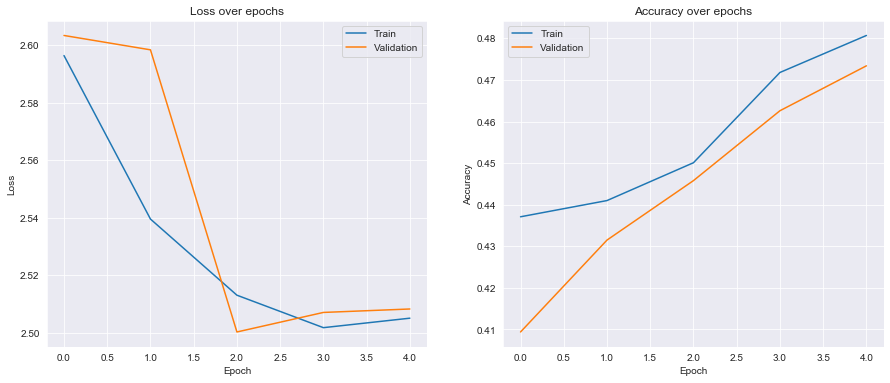

In [18]:
plot_summary(hist6)

#### Observation
From the above the model we observed that the dense CNN architectures are working well. so we tried here dense cnn architecture that is used for cifr classification. We used 20 layered dense architecture with compression as 0.5 and number of filters equal to 12 as these are the tuned parameters for the arcitecture. We trained the model with spectrogram images input made for the resnet architecture of the shape (224,224,3). We used conv2d, batchnormalization, pooling layers, dropout etc. with relu as activation in the dense block and trainsition block while in the output layer we used two conv layer, global average pooling and finally dense layer with units as number of classes i.e 265 to  get the output.

We tried similar training method as that of previous CNN architectures with batches of epochs at time due to machine limitaions and high epoch time. Among various training parameters tried for a baatch the final training is done on best parmaters. The final trainin is done here with optimizer as sgd with momentum with learning rate 0.001.

The results obtained as observed is found to be better than the resnet model but could not beat the performance obtained by our Inception model and hence suggests that the increase in complexity does not help in improving the performance. So, in the next section we will try some less complex CNN models like VGG and observe the results. 

But before going further let us try some ML ensemble techniques on this features generated by CNN models and see if they give any improvements or not.

### 7.3 Ensemble using ML Models

In [4]:
# Model loading and data preparation
m1 = tf.keras.models.load_model('model_logs/model_res50.h5',custom_objects={'f1':fs})
m2 = tf.keras.models.load_model('model_logs/model_inceptionv3.h5',custom_objects={'f1':fs})
m3 = tf.keras.models.load_model('model_logs/model_dense.h5',custom_objects={'f1':fs})

x_tr1 = m1(train_gen_res)
x_tr2 = m2(train_gen_incep)
x_tr3 = m3(train_gen_res)

x_te1 = m1(test_gen_res)
x_te2 = m2(test_gen_incep)
x_te3 = m3(test_gen_res)

X = np.vstack((x_tr1,x_tr2,x_tr3))
X_te = np.vstack((x_te1,x_te2,x_te3))

# getting the proper labels
y = []
for i in len(train_gen_res):
    y_tr.extend(np.argwhere(train_gen_res[i][1]>0.5))
    
y_te = []
for i in len(test_gen_res):
    y_te.extend(np.argwhere(training_res[i][1]>0.5))

In [68]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from scipy.stats import randint as sp_randint

In [70]:
# tuning Logistic
x_cfl = SGDClassifier(loss='log', random_state=45,n_jobs=-1)

prams = { 'alpha':[0.001,0.01,0.1,1,10,100,1000]}

random_cfl1 = RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=5,n_jobs=-1,random_state=45,
                               return_train_score=True)

random_cfl1.fit(X,y)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

# tuning svm
x_cfl = SGDClassifier(loss='hinge', random_state=45,n_jobs=-1)

prams = { 'alpha':[0.001,0.01,0.1,1,10,100,1000]}

random_cfl1 = RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=5,n_jobs=-1,random_state=45,
                               return_train_score=True)

random_cfl1.fit(X,y)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

# Parameter tuning of Random forest classifier using Randomised search CV
param_dist = {"n_estimators":sp_randint(1,500),
              "max_depth": sp_randint(3,20),
              "min_samples_split": sp_randint(50,200),
              "min_samples_leaf": sp_randint(2,50)}

clf = RandomForestClassifier(random_state=45,n_jobs=-1)

random_cfl1 = RandomizedSearchCV(clf,param_distributions=param_dist,verbose=5,n_jobs=-1,random_state=45,
                               return_train_score=True)
random_cfl1.fit(X,y)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])
# print("""mean test scores [0.52784267 0.51454799 0.52288333 0.5648653 0.55747887]
# mean train scores [0.53456205 0.5163616  0.56412152 0.56941303 0.57147887]""")

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    4.3s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.6s finished


mean test scores [0.07321429 0.07857143 0.07857143 0.07142857 0.05       0.03928571
 0.03928571]
mean train scores [0.07455357 0.07857143 0.07857143 0.071875   0.05178571 0.04151786
 0.04151786]
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    2.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    2.6s finished


mean test scores [0.04821429 0.04285714 0.0625     0.0375     0.02857143 0.03928571
 0.03928571]
mean train scores [0.04821429 0.04330357 0.06160714 0.04866071 0.03482143 0.04151786
 0.04151786]
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    8.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.4s finished


mean test scores [0.11607143 0.12678571 0.13571429 0.1375     0.11607143 0.125
 0.11607143 0.12857143 0.11428571 0.13035714]
mean train scores [0.13303571 0.17008929 0.16205357 0.25357143 0.128125   0.15133929
 0.18973214 0.14598214 0.18928571 0.15223214]


In [65]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl = XGBClassifier(random_state=45,n_jobs=-1)

prams = { 'learning_rate':[0.001,0.01,0.03,0.05,0.1,0.15,0.2],
         'n_estimators':[1,3,5,10,50,100,250,500,1000],
         'max_depth':[3,5,10,15,20,50],'colsample_bytree':[0.1,0.3,0.5,1],
         'subsample':[0.1,0.3,0.5,1]
        }

random_cfl1 = RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=5,n_jobs=-1,random_state=45,
                               return_train_score=True)

random_cfl1.fit(X,y)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])
# print("""mean test scores [0.52784267 0.51454799 0.52288333 0.5648653 0.55747887]
# mean train scores [0.53456205 0.5163616  0.56412152 0.56941303 0.57147887]""")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:  3.2min remaining:   16.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.2min finished


mean test scores [0.12857143 0.0625     0.08571429 0.19107143 0.16964286 0.0625
 0.15535714 0.2375     0.2125     0.07321429]
mean train scores [0.16428571 0.06383929 0.08348214 0.265625   0.309375   0.06339286
 0.18526786 0.35044643 0.34598214 0.07410714]


In [63]:
clf = XGBClassifier(n_estimators=50, max_depth=15,subsample=0.5,learning_rate=0.2,colsample_bytree=0.3,random_state=45,
                      n_jobs=-1)
clf.fit(X,y)
pickle.dump(clf, open('model_logs/NN_soft_stacking.pkl','wb'))

y_train_pred = clf.predict(X)
y_test_pred = clf.predict(X_cv)
# printing train and test scores
print('Train f1 score',f1_score(y,y_train_pred, average='macro'))
print('Test f1 score',f1_score(y_cv,y_test_pred,average='macro'))

Train f1 score 0.5729005524861879
Test f1 score 0.5176014801841756


#### Observation
Here, we tried some ensemble techniques to improve our performance. For that we trained multiple ML models on the predictions made on the train data. We used a randomized search cross validation to tune the paramaters of these models for faster computation and found the XGBoost to be performing best. Finally we trained the XGBoost on the training data with best parameters and observed the result. 

We found that we achieved similar to our best model inceptionv3 with 0.57 f1 score which is some improvement to the previous performance and best of all suggesting that ML models are doing better on learning these extracted features from the CNN models so in next sections we will try to train some simple neural network models on these features and see we can do any better.

Also, All the above models are either trained on the spectrogram data like LSTM or spectrogram images like CNN models where these spectrograms are carefully extracted from the insights of EDA done above and we found that we are not achieving results better than those of inception model. 

So, in the next section we will try similar CNN models from low complexity to medium not vey much as seen in case of dense-net but instead of spectrogram images we will use mel-spectrogram as discussed in EDA, some augmentation like adding noise to the data, pitch shifting etc. and combination of both spectrogram and mel-spec as well.

### 7.4 CNN Models(MEL-SPEC)

In [168]:
# Defining the parameters and setting seed values
seed = 45
random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

NUM_CLASSES = 264 # using only the birs species and not including nocall
CLASSES = list(df_audio['ebird_code'].unique())
TARGETS = np.eye(NUM_CLASSES)

class params:
    sr = 32000
#     sr = 44100
    duration = 5
    img_size = None

    # Melspectrogram
    n_mels = 128
    fmin = 20
    fmax = 16000
    
    n_fft = n_mels * 20 # Size of fft window - smooths the spectrogram
    
    spec_width = 256
    hop_length = duration * sr // spec_width + 1   # Computed to have width=spec_width

In [169]:
# Code from https://www.kaggle.com/daisukelab/creating-fat2019-preprocessed-data
# https://pypi.org/project/audiomentations/

def mono_to_color(X, eps=1e-6, mean=None, std=None):
    """
    Converts a one channel array to a 3 channel one in [0, 255]
    Arguments:
        X {numpy array [H x W]} -- 2D array to convert
    Keyword Arguments:
        eps {float} -- To avoid dividing by 0 (default: {1e-6})
        mean {None or np array} -- Mean for normalization (default: {None})
        std {None or np array} -- Std for normalization (default: {None})
    Returns:
        numpy array [3 x H x W] -- RGB numpy array
    """
    X = np.stack([X, X, X], axis=-1)

    # Standardize
    mean = mean or X.mean()
    std = std or X.std()
    X = (X - mean) / (std + eps)

    # Normalize to [0, 255]
    _min, _max = X.min(), X.max()

    if (_max - _min) > eps:
        V = np.clip(X, _min, _max)
        V = 255 * (V - _min) / (_max - _min)
        V = V.astype(np.uint8)
    else:
        V = np.zeros_like(X, dtype=np.uint8)

    return V


def normalize(image, mean=None, std=None):
    """
    Normalizes an array in [0, 255] to the format adapted to neural network
    Arguments:
        image {np array [3 x H x W]} -- [description]
    Keyword Arguments:
        mean {None or np array} -- Mean for normalization, expected of size 3 (default: {None})
        std {None or np array} -- Std for normalization, expected of size 3 (default: {None})
    Returns:
        np array [H x W x 3] -- Normalized array
    """
    image = image / 255.0
    if mean is not None and std is not None:
        image = (image - mean) / std
    return image.astype(np.float32) # np.moveaxis(image, 2, 0).astype(np.float32)


def crop_or_pad(y, length, sr, train=True, probs=None):
    """
    Crops an array to a chosen length
    Arguments:
        y {1D np array} -- Array to crop
        length {int} -- Length of the crop
        sr {int} -- Sampling rate
    Keyword Arguments:
        train {bool} -- Whether we are at train time. If so, crop randomly, else return the beginning of y (default: {True})
        probs {None or numpy array} -- Probabilities to use to chose where to crop (default: {None})
    Returns:
        1D np array -- Cropped array
    """
    if len(y) <= length:
        y = np.concatenate([y, np.zeros(length - len(y))])
    else:
        if not train:
            start = 0
        elif probs is None:
            start = np.random.randint(len(y) - length)
        else:
            start = (
                np.random.choice(np.arange(len(probs)), p=probs) + np.random.random()
            )
            start = int(sr * (start))

        y = y[start : start + length]

    return y.astype(np.float32)

def augmentation():
    """
    Returns the transformation to apply on waveforms
    Returns:
        Audiomentations transform -- Transforms
    """
    transforms = Compose(
        [
            AddGaussianSNR(max_SNR=0.5, p=0.5),
            AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
            TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
            PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
        ]
    )
    return transforms

In [170]:
# http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.feature.melspectrogram.html

def compute_melspec(y, params):
    """
    Computes a mel-spectrogram and puts it at decibel scale
    Arguments:
        y {np array} -- signal
        params {AudioParams} -- Parameters to use for the spectrogram. Expected to have the attributes sr, n_mels, f_min, f_max
    Returns:
        np array -- Mel-spectrogram
    """
    melspec = librosa.feature.melspectrogram(y, sr=params.sr, n_mels=params.n_mels, hop_length=params.hop_length,
                                             fmin=params.fmin, fmax=params.fmax)
    melspec = librosa.power_to_db(melspec).astype(np.float32)
    
    return melspec


def compute_spectrogram(y, params):
    """
    Computes a spectrogram and puts it at decibel scale
    Arguments:
        y {np array} -- signal
        params {AudioParams} -- Parameters to use for the spectrogram. Expected to have the attributes sr, n_mels, f_min, f_max
    Returns:
        np array -- Mel-spectrogram
    """
    X = np.abs(librosa.stft(y, n_fft=1024, hop_length=params.hop_length))
    spect = librosa.amplitude_to_db(X).astype(np.float32)

    return spect

In [171]:
# Referred from the AppliedAI Assignments

class MelSpecDataset:
    """
    Tensor dataset
    """

    def __init__(self, df, params, train=True):
        """
        Constructor
        Arguments:
            df {pandas dataframe} -- Metadata
            params {AudioParams} -- Audio parameters
        Keyword Arguments:
            train {bool} -- Whether the dataset is used for training or validation (default: {True})
            use_conf {bool} -- Whether to use confidence for cropping (default: {False})
        """
        self.train = train
        self.params = params

#         self.augment = augmentation() if train else None

        self.y = np.array([CLASSES.index(c) for c in df["ebird_code"]])
        self.paths = df["filepath"].values

        self.sample_len = params.duration * params.sr
        

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
#         y, sr = soundfile.read(self.paths[idx])
        try:
            samples, sample_rate = librosa.load(self.paths[idx],sr=self.params.sr)
        except:
            sound = AudioSegment.from_file(self.paths[idx])
            samples = sound.get_array_of_samples()
            new_sound = sound._spawn(samples)
            samples = np.array(samples).astype(np.float32)
        

        samples = crop_or_pad(
            samples, self.sample_len, sr=self.params.sr, train=self.train, probs=None
        )

        if self.augment is not None:
            samples = self.augment(samples, self.params['sr'])

        melspec = compute_melspec(samples, self.params)

        image = mono_to_color(melspec)
        image = normalize(image, mean=None, std=None)

        return image, TARGETS[self.y[idx]]

In [172]:
class SpecDataset:
    """
    Tensor dataset
    """

    def __init__(self, df, params, train=True):
        """
        Constructor
        Arguments:
            df {pandas dataframe} -- Metadata
            params {AudioParams} -- Audio parameters
        Keyword Arguments:
            train {bool} -- Whether the dataset is used for training or validation (default: {True})
            use_conf {bool} -- Whether to use confidence for cropping (default: {False})
        """
        self.train = train
        self.params = params

        self.augment = augmentation() if train else None

        self.y = np.array([CLASSES.index(c) for c in df["ebird_code"]])
        self.paths = df["filepath"].values

        self.sample_len = params.duration * params.sr
        

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
#         y, sr = soundfile.read(self.paths[idx])
        try:
            samples, sample_rate = librosa.load(self.paths[idx],sr=self.params.sr)
        except:
            sound = AudioSegment.from_file(self.paths[idx])
            samples = sound.get_array_of_samples()
            new_sound = sound._spawn(samples)
            samples = np.array(samples).astype(np.float32)
        

        samples = crop_or_pad(
            samples, self.sample_len, sr=self.params.sr, train=self.train, probs=None
        )

#         if self.augment is not None:
#             samples = self.augment(samples, self.params['sr'])

        spec = compute_spectrogram(samples, self.params)

        image = mono_to_color(spec)
        image = normalize(image, mean=None, std=None)

        return image, TARGETS[self.y[idx]]

In [173]:
class Dataloader(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

    def __getitem__(self, i):
        
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])
        
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
        
        return tuple(batch)
    
    def __len__(self):
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

Spec images data:  (128, 256, 3)


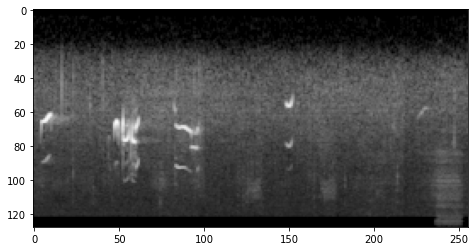

In [174]:
# checking the data after pre-processing
train_dataset = MelSpecDataset(X_train,Params)
img = train_dataset[0][0]
print("Spec images data: ",img.shape)
plt.figure(figsize=(15,4))
plt.imshow(img)

##### Observation
As decided above, we have prepared dataset which is in batches of 8 due to machine limitation with mel-spec features and some augmentations like adding gaussian noise, removing signal to noise ratio, pitch shifting etc. we introduced small noise and pitch shift upto 3-5% as the changes made more than this effects the calls in the audio adversely.

Also, in previous sections we trained with num_classed=265 where one of the class is **nocall** meaning no call is present in the audio while here we will go with 264 classes which is 264 different bird species and no **nocall**. The data is here is properly resized, normalized, crop/padded and augmentated for model training.

Now, that we have prepared our data it is time to go for model training and observe the results. As observed from above results, we will start with pre-trained VGG model and train it on both spect and mel-spec data.

#### 7.4.1 VGG16

In [124]:
# loading the data of mel-spectrogram images
train_dataset = MelSpecDataset(X_train,Params)
test_dataset = MelSpecDataset(X_test,Params)

# loading the data of spectrogram images
train_specdata = SpecDataset(X_train,Params)
test_specdata = SpecDataset(X_test,Params)

# making the data loader pipeline with batch size = 8
BATCH_SIZE = 8
mel_train_dataloader = Dataloader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
mel_test_dataloader = Dataloader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)
spec_train_dataloader = Dataloader(train_specdata, batch_size=BATCH_SIZE, shuffle=True)
spec_test_dataloader = Dataloader(test_specdata, batch_size=BATCH_SIZE, shuffle=True)

# checking the example loader
print("Mel Train: ",mel_train_dataloader[0][0].shape,mel_test_dataloader[0][1].shape)
print("Spec Train: ",spec_train_dataloader[0][0].shape,spec_test_dataloader[0][1].shape)

Mel Train:  (8, 128, 256, 3) (8, 264)
Spec Train:  (8, 513, 256, 3) (8, 264)


In [185]:
# VGG16 network for spectrogram images
input_layer = Input(shape=spec_train_dataloader[0][0].shape[1:])
layer_1 = VGG16(include_top=False,weights="imagenet",input_tensor=input_layer)
layer_1.trainable = False
average = tf.keras.layers.GlobalAveragePooling2D()(layer_1.output)
dense = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(average)
output = Dense(NUM_CLASSES,activation='sigmoid')(dense)

model_vgg1 = Model(inputs=input_layer,outputs=output)
model_vgg1.summary()

Model: "functional_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 513, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 513, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 513, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 64, 128)    

Epoch 1/10
267/267 [==============================] - 3895s 14s/step - loss: 1.3119 - accuracy: 0.2061 - f1_score: 0.2061 - val_loss: 1.7149 - val_accuracy: 0.3822 - val_f1_score: 0.3822 
Epoch 2/10
267/267 [==============================] - 3895s 14s/step - loss: 1.3202 - accuracy: 0.3479 - f1_score: 0.3479 - val_loss: 1.0907 - val_accuracy: 0.3410 - val_f1_score: 0.3410 
Epoch 3/10
267/267 [==============================] - 3894s 14s/step - loss: 0.8778 - accuracy: 0.4002 - f1_score: 0.4002 - val_loss: 0.9668 - val_accuracy: 0.3815 - val_f1_score: 0.3815 
Epoch 4/10
267/267 [==============================] - 3895s 14s/step - loss: 0.8493 - accuracy: 0.4594 - f1_score: 0.4594 - val_loss: 0.8672 - val_accuracy: 0.4402 - val_f1_score: 0.4402 
Epoch 5/10
267/267 [==============================] - 3895s 14s/step - loss: 0.8860 - accuracy: 0.4745 - f1_score: 0.4745 - val_loss: 0.9200 - val_accuracy: 0.4323 - val_f1_score: 0.4323 
Epoch 6/10
267/267 [==============================] - 3895s 

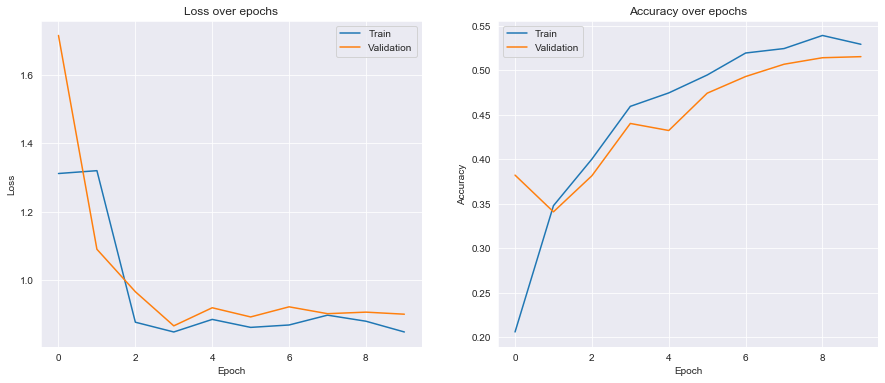

In [81]:
# Training
optim = tf.keras.optimizer.Adam(learning_rate=0.001)
callbacks = callbacks('vgg_fit1','model_vgg1')

model_vgg1.compile(loss=loss_function, optimizer=optim, metrics=['accuracy',fs])
 
steps_per_epoch = len(spec_train_dataloader)//BATCH_SIZE
hist7 = model_vgg1.fit(spec_train_dataloader, epochs = 10, validation_data=spec_test_dataloader,
                       steps_per_epoch=steps_per_epoch, callbacks=callbacks)

plot_summary(hist7)

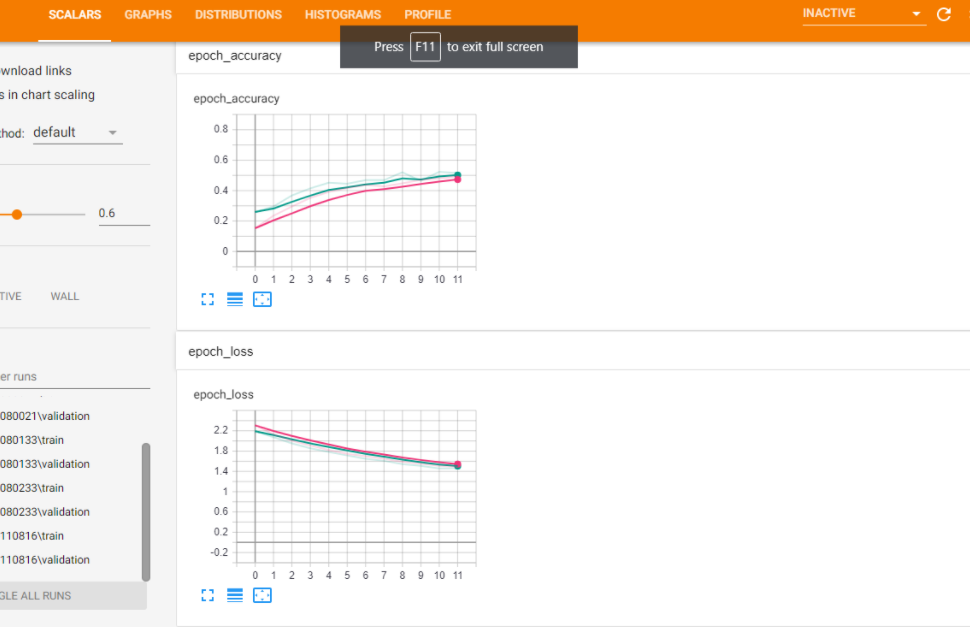

In [87]:
Image('vgg_tensor.png')

##### Observation
Here, we tried our hands on the pre-trained VGG16 network with our spectragram images data. We used VGG as feature extractor for the images and then trained some layers to classify them accordingly. From the results obtained, we observe that the model is performing similar to our previous CNN models like resnet with score around 0.52 f1-score suggesting that the even with augmentation the spectrogram images does not help in improving the results much.

So, it is time to go with the mel-spec images and see we can improve or not.

In [82]:
# VGG16 network for mel-spectrogram images
input_layer = Input(shape=mel_train_dataloader[0][0].shape[1:])
layer_1 = VGG16(include_top=False,weights="imagenet",input_tensor=input_layer)
layer_1.trainable = False
average = tf.keras.layers.GlobalAveragePooling2D()(layer_1.output)
dense = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(average)
output = Dense(NUM_CLASSES,activation='sigmoid')(dense)

model_vgg2 = Model(inputs=input_layer,outputs=output)
# model_vgg2.summary()

Epoch 1/10
267/267 [==============================] - 3819s 14s/step - loss: 0.8944 - accuracy: 0.6964 - f1_score: 0.6964 - val_loss: 0.8717 - val_accuracy: 0.7137 - val_f1_score: 0.7137
Epoch 2/10
267/267 [==============================] - 3819s 14s/step - loss: 0.914 - accuracy: 0.6867 - f1_score: 0.6867 - val_loss: 0.917 - val_accuracy: 0.693 - val_f1_score: 0.693
Epoch 3/10
267/267 [==============================] - 3819s 14s/step - loss: 0.904 - accuracy: 0.6855 - f1_score: 0.6855 - val_loss: 0.8981 - val_accuracy: 0.7093 - val_f1_score: 0.7093
Epoch 4/10
267/267 [==============================] - 3819s 14s/step - loss: 0.9049 - accuracy: 0.6884 - f1_score: 0.6884 - val_loss: 0.873 - val_accuracy: 0.7102 - val_f1_score: 0.7102
Epoch 5/10
267/267 [==============================] - 3819s 14s/step - loss: 0.8887 - accuracy: 0.6898 - f1_score: 0.6898 - val_loss: 0.8841 - val_accuracy: 0.7104 - val_f1_score: 0.7104
Epoch 6/10
267/267 [==============================] - 3819s 14s/step - 

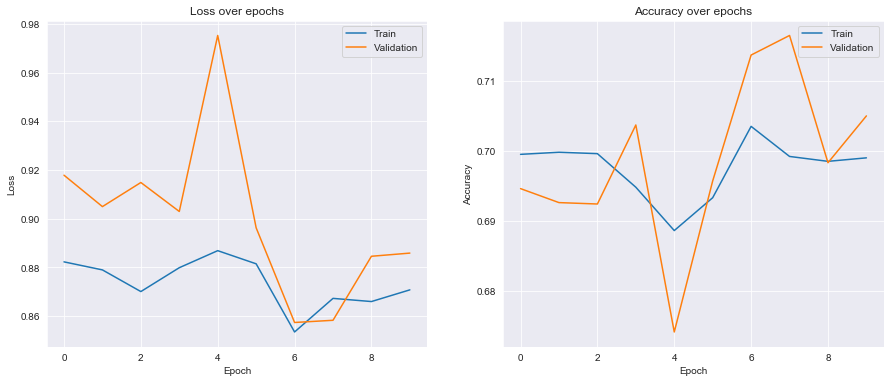

In [57]:
# Training
optim = tf.keras.optimizer.Adam(learning_rate=0.001)
callbacks = callbacks('vgg_fit2','model_vgg3')

model_vgg2.compile(loss=loss_function, optimizer=optim, metrics=['accuracy',fs])
 
steps_per_epoch = len(mel_train_dataloader)//BATCH_SIZE
hist9 = model_vgg1.fit(mel_train_dataloader, epochs = 10, validation_data=mel_test_dataloader,
                       steps_per_epoch=steps_per_epoch, callbacks=callbacks)

plot_summary(hist10)   

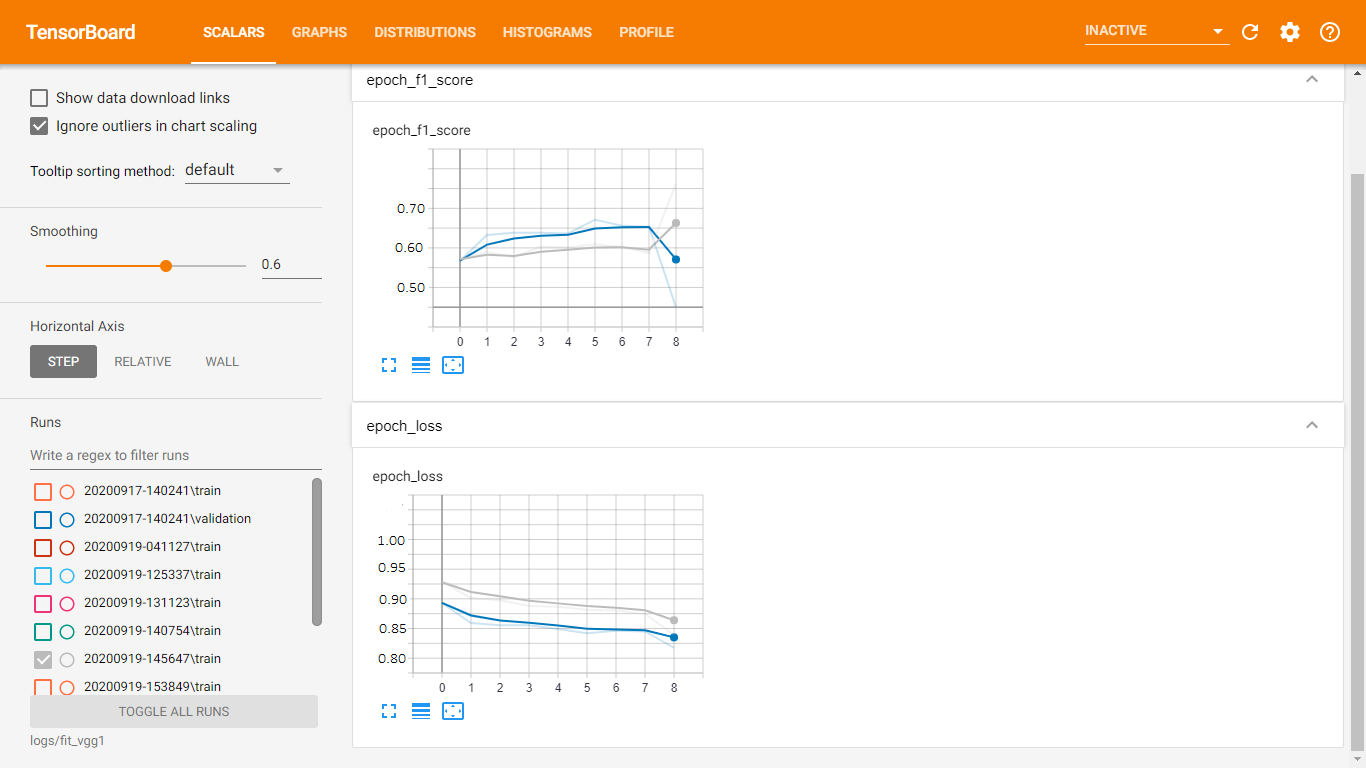

In [90]:
Image('C:/Users/Kumar Gaurav/Pictures/Screenshots/vgg2.png')

##### Observation
Here, we tried the same VGG network as above but wirh different input i.e mel-spec images and hence avoided printing the summary of model to avoid the notebook complexity. We trained the model with adam optimizer and 0.001 learning rate and from the results obtained we can clearly observe that we are doing better than all the models with these features of data. We achieved around 0.69 f1-score for this model. Also, the simple and basic augmentation seems to be helping well in learning the features by the model.

Now, we observed that VGG models are working quite well on mel-spectrogram images. let us look at some more complex models like resnet and inception as done in previous sections.

#### 7.4.2 ResNets50

In [9]:
# resnet network for mel-spectrogram images
input_layer = Input(shape=mel_train_dataloader[0][0].shape[1:])
layer_1 = ResNet50(include_top=False,weights="imagenet",input_tensor=input_layer)
layer_1.trainable = False
average = tf.keras.layers.GlobalAveragePooling2D()(layer_1.output)
dense = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(average)
output = Dense(NUM_CLASSES,activation='sigmoid')(dense)

model_res50 = Model(inputs=input_layer,outputs=output)
# model_res50.summary()

Epoch 1/10
267/267 [==============================] - 3819s 14s/step - loss: 0.8373 - accuracy: 0.7093 - f1_score: 0.7093 - val_loss: 0.8772 - val_accuracy: 0.7098 - val_f1_score: 0.7098
Epoch 2/10
267/267 [==============================] - 3819s 14s/step - loss: 0.812 - accuracy: 0.7195 - f1_score: 0.7195 - val_loss: 0.879 - val_accuracy: 0.7043 - val_f1_score: 0.7043
Epoch 3/10
267/267 [==============================] - 3819s 14s/step - loss: 0.8179 - accuracy: 0.7129 - f1_score: 0.7129 - val_loss: 0.8583 - val_accuracy: 0.708 - val_f1_score: 0.708
Epoch 4/10
267/267 [==============================] - 3819s 14s/step - loss: 0.8237 - accuracy: 0.7134 - f1_score: 0.7134 - val_loss: 0.9341 - val_accuracy: 0.6963 - val_f1_score: 0.6963
Epoch 5/10
267/267 [==============================] - 3819s 14s/step - loss: 0.8116 - accuracy: 0.7161 - f1_score: 0.7161 - val_loss: 0.8529 - val_accuracy: 0.7057 - val_f1_score: 0.7057
Epoch 6/10
267/267 [==============================] - 3819s 14s/step 

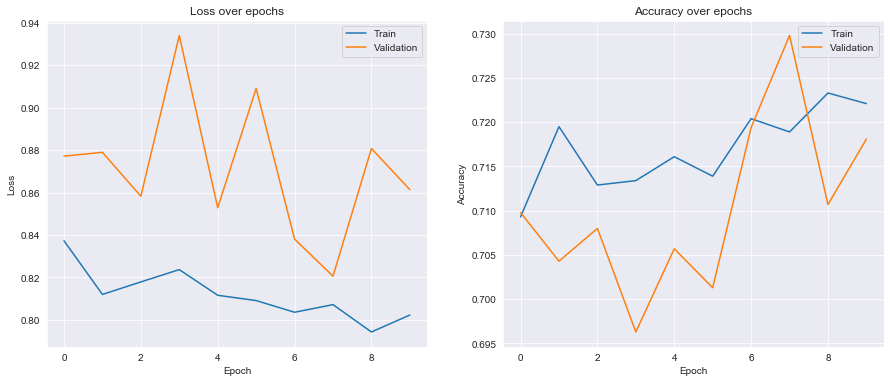

In [53]:
optim = tf.keras.optimizer.Adam(learning_rate=0.001)
callbacks = callbacks('resnet_fit1','model_res1')

model_res50.compile(loss=loss_function, optimizer=optim, metrics=['accuracy',fs])
 
steps_per_epoch = len(mel_train_dataloader)//BATCH_SIZE
hist8 = model_res50.fit(mel_train_dataloader, epochs = 10, validation_data=mel_test_dataloader,
                       steps_per_epoch=steps_per_epoch, callbacks=callbacks)

plot_summary(hist8)

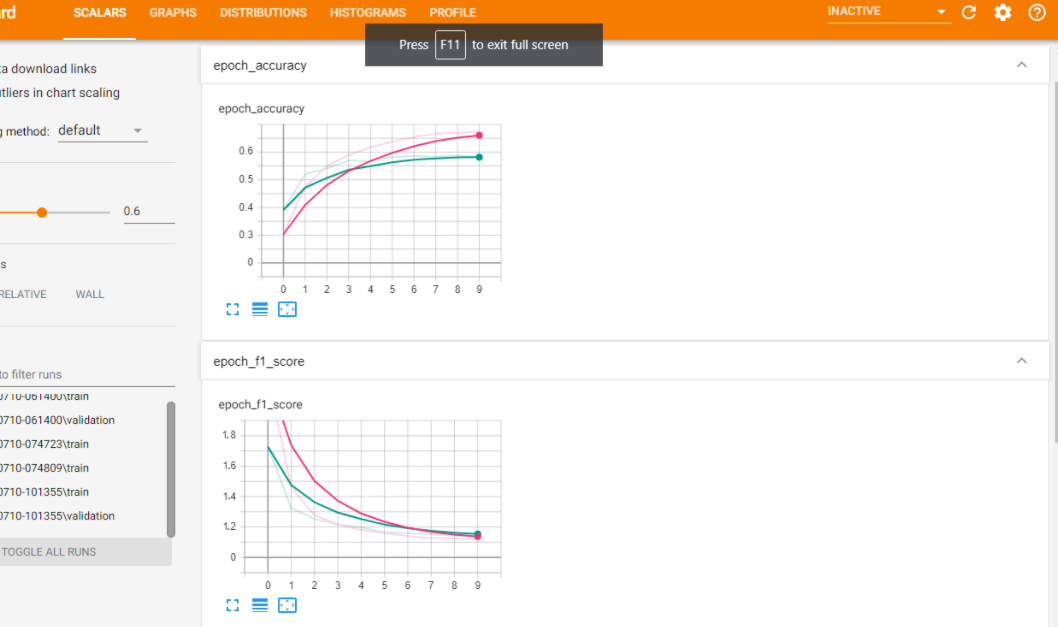

In [89]:
Image('res_tensor.png')

##### Observation:-
From the promising results of VGG network we thought of trying some more complex models not too complex and see the results and hence we decided to try resnet50 in this section.
We used similar resnet architecture as that of previous section while with mel-spec input and output which does not give any label to if no call is found in the audio.

The model is trained in batches of 10 epochs at a time due to large epoch time and machine limitations. We used similar metrics as previous models in with the best perfroming prameters like adam with learning rate 0.001 is kept here as the final training optimizer. Various callbacks similar to previous models are used to keep track of the training. As observed from the results, we found that the CNN models are obviously performing better than the LSTM models. We achieved around 0.72 f1-score which is the best of the architectures till now. 

#### 7.4.3 InceptionV3

In [10]:
# inception network for mel-spectrogram images
input_layer = Input(shape=mel_train_dataloader[0][0].shape[1:])
layer_1 = InceptionV3(include_top=False,weights="imagenet",input_tensor=input_layer)
layer_1.trainable = False
average = GlobalAveragePooling2D()(layer_1.output)
dense = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(average)
output = Dense(NUM_CLASSES,activation='sigmoid')(dense)

model_inceptionv3 = Model(inputs=input_layer,outputs=output)
# model_inceptionv3.summary()

Epoch 1/10
267/267 [==============================] - 6095s 11s/step - loss: 1.8678 - accuracy: 0.3857 - f1_score: 0.6584 - val_loss: 1.8264 - val_accuracy: 0.4158 - val_f1_score: 0.6336
Epoch 2/10
267/267 [==============================] - 6181s 12s/step - loss: 1.6518 - accuracy: 0.4669 - f1_score: 0.1553 - val_loss: 1.7181 - val_accuracy: 0.4591 - val_f1_score: 0.1523
Epoch 3/10
267/267 [==============================] - 6095s 11s/step - loss: 1.4821 - accuracy: 0.5281 - f1_score: 0.2479 - val_loss: 1.5933 - val_accuracy: 0.4908 - val_f1_score: 0.2492
Epoch 4/10
267/267 [==============================] - 6181s 12s/step - loss: 1.3757 - accuracy: 0.5654 - f1_score: 0.3739 - val_loss: 1.4543 - val_accuracy: 0.5155 - val_f1_score: 0.3463
Epoch 5/10
267/267 [==============================] - 6095s 11s/step - loss: 1.2710 - accuracy: 0.6034 - f1_score: 0.5208 - val_loss: 1.3471 - val_accuracy: 0.5684 - val_f1_score: 0.5432
Epoch 6/10
442/442 [==============================] - 6095s 11s/s

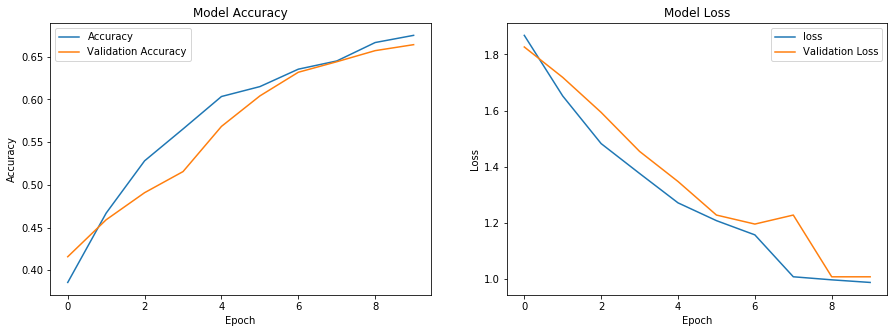

In [23]:
# Training
optim = tf.keras.optimizer.Adam(learning_rate=0.001)
callbacks = callbacks('inception_fit1','model_inception1')

model_inceptionv3.compile(loss=loss_function, optimizer=optim, metrics=['accuracy',fs])
 
steps_per_epoch = len(mel_train_dataloader)//BATCH_SIZE
hist10 = model_inceptionv3.fit(mel_train_dataloader, epochs = 10, validation_data=mel_test_dataloader,
                       steps_per_epoch=steps_per_epoch, callbacks=callbacks)

plot_summary(hist10)

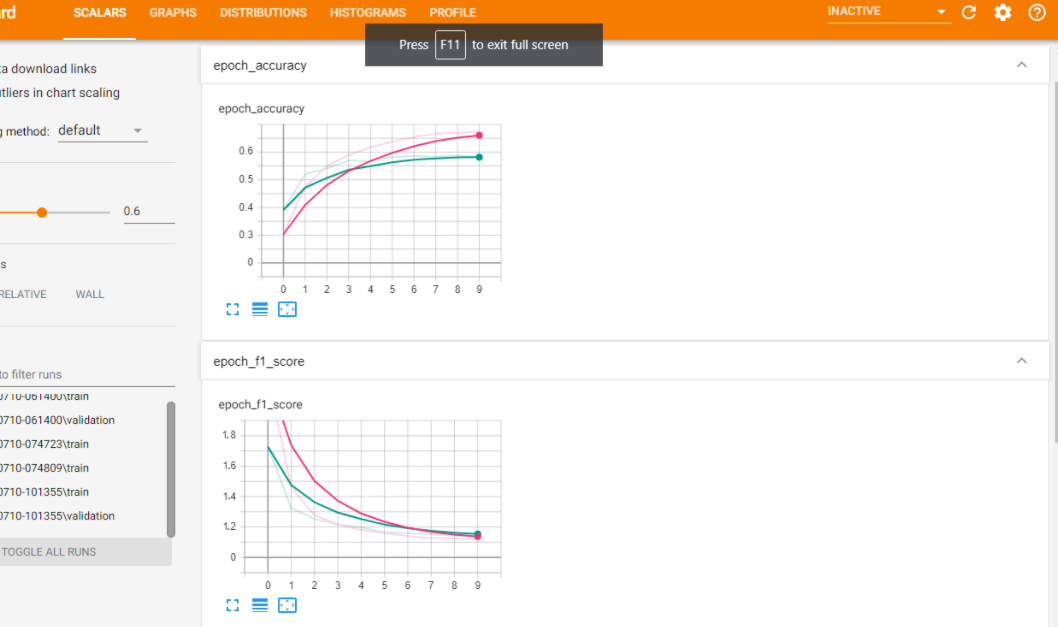

In [24]:
Image('incep_tensor.png')

#### Observation:-
From the results shown by resnet50 model, we found that cnn models are working better in this context so, in order to achieve good results we decided to experiment with another CNN based architecture i.e InceptionV3. Here, I tried the same Inceptionv3 architecture used previously.
The training is done similarly to resnet models in batches of epochs as epoch times are long and machine limitations. We used various callbacks to track the training, multiple training paradigms are tried from various optimizers to learning rate the best among them is found to be adam with 0.001 learning rate where the learning rate is reduced by 10% if training reaches a stalemate.

As observed from the results we found that this architecture is found to be performing better than the previous one and also achieved best results among them with around 0.73 f1-score.
If we gather everything till now, we learnt that too deep CNN architectures are not working well, mel-spec is giving better results than spectrograms, simple augmentation is also helping and simple ML ensembles are not working as expected. So, let us try combining features and results from these good performing networks like VGG, resnet, and inception and train some different networks and compare the results. 

#### 7.4.4 VGG and ResNet50 Ensemble

In [83]:
# fusing resnet and vgg network for mel-spectrogram images
input_1 = Input(shape=mel_train_dataloader[0][0].shape[1:])
layer_1 = ResNet50(include_top=False,weights="imagenet",input_tensor=input_1)
layer_1.trainable = False

input_2 = Input(shape=mel_train_dataloader[0][0].shape[1:])
vgg_2 = VGG16(include_top=False,weights="imagenet",input_tensor=input_2)
vgg_2.trainable = False
for i in vgg_2.layers:
    i._name = i.name+'_2'

feature_fuse = concatenate([layer_1.output,vgg_2.output])
average = tf.keras.layers.GlobalAveragePooling2D()(feature_fuse)
dense = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(average)
output = Dense(NUM_CLASSES,activation='sigmoid')(dense)

resnet_vgg = Model(inputs=[input_1,input_2],outputs=output)
# resnet_vgg.summary()

Epoch 1/10
267/267 [==============================] - 6095s 11s/step - loss: 2.3119 - accuracy: 0.2061 - f1_score: 0.1821 - val_loss: 1.7149 - val_accuracy: 0.3822 - val_f1_score: 0.2101
Epoch 2/10
267/267 [==============================] - 6095s 11s/step - loss: 1.3202 - accuracy: 0.5479 - f1_score: 0.5479 - val_loss: 1.0907 - val_accuracy: 0.6410 - val_f1_score: 0.6410 
Epoch 3/10
267/267 [==============================] - 6181s 12s/step - loss: 0.8778 - accuracy: 0.7002 - f1_score: 0.7002 - val_loss: 0.9668 - val_accuracy: 0.6815 - val_f1_score: 0.6815 
Epoch 4/10
267/267 [==============================] - 6095s 11s/step - loss: 0.8493 - accuracy: 0.7594 - f1_score: 0.7594 - val_loss: 0.8672 - val_accuracy: 0.7402 - val_f1_score: 0.7402 
Epoch 5/10
267/267 [==============================] - 6181s 12s/step - loss: 0.8860 - accuracy: 0.7745 - f1_score: 0.7745 - val_loss: 0.9200 - val_accuracy: 0.7323 - val_f1_score: 0.7323 
Epoch 6/10
267/267 [==============================] - 6095s 1

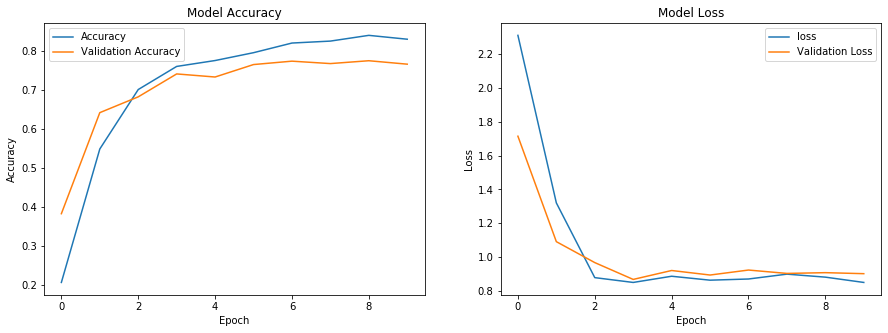

In [86]:
# Training
optim = tf.keras.optimizer.Adam(learning_rate=0.001)
callbacks = callbacks('ensemble1','ensemble1')

resnet_vgg.compile(loss=loss_function, optimizer=optim, metrics=['accuracy',fs])
 
steps_per_epoch = len(mel_train_dataloader)//BATCH_SIZE
hist_ensemble1 = resnet_vgg.fit([mel_train_dataloader[:,0],mel_train_dataloader[:,0]],mel_train_dataloader[:,1], epochs = 10, 
                       validation_data=([mel_test_dataloader[:,0],mel_test_dataloader[:,0]],mel_test_dataloader[:,1]),
                       steps_per_epoch=steps_per_epoch, callbacks=callbacks)

plot_summary(hist_ensemble1)

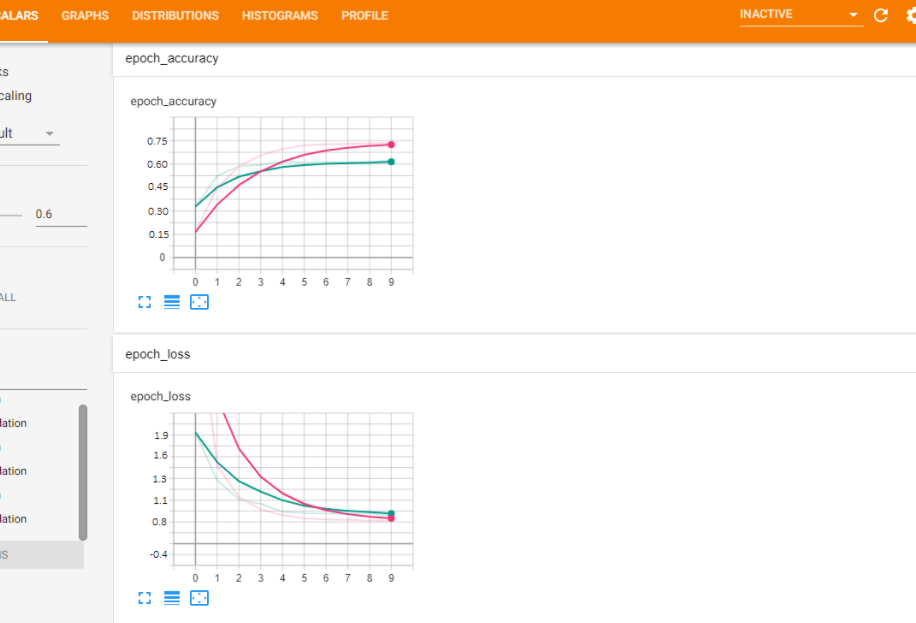

In [27]:
Image('tensot_res_vgg.png')

##### Observation
Here, I tried the VGG and ResNet as feature extractor and then combined these features extracted and trained a simple neural network classifier on these features. We used similar training for this model as well with adam optimizer and learning rate of 0.001. From the results obtained we observe that the model is actually doing well suggesting that it is able to learn the features quite well and achieves score of around 0.83 f1-score which is quite good.

In [84]:
# fusing resnet and vgg network for mel-spectrogram images
input_1 = Input(shape=mel_train_dataloader[0][0].shape[1:])
layer_1 = ResNet50(include_top=False,weights="imagenet",input_tensor=input_1)
layer_1.trainable = False

input_2 = Input(shape=mel_train_dataloader[0][0].shape[1:])
vgg_2 = VGG16(include_top=False,weights="imagenet",input_tensor=input_2)
vgg_2.trainable = False
for i in vgg_2.layers:
    i._name = i.name+'_2'


average1 = tf.keras.layers.GlobalAveragePooling2D()(layer_1.output)
dense1 = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(average1)
output1 = Dense(NUM_CLASSES,activation='softmax')(dense1)

average2 = tf.keras.layers.GlobalAveragePooling2D()(vgg_2.output)
dense2 = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense2')(average2)
output2 = Dense(NUM_CLASSES,activation='softmax')(dense2)

feature_fuse = concatenate([output1,output2])
output = Dense(NUM_CLASSES,activation='softmax')(feature_fuse)

resnet_vgg1 = Model(inputs=[input_1,input_2],outputs=output)
# resnet_vgg1.summary()

Epoch 1/10
267/267 [==============================] - 3819s 14s/step - loss: 0.7618 - accuracy: 0.7464 - f1_score: 0.7464 - val_loss: 0.8107 - val_accuracy: 0.7567 - val_f1_score: 0.7567
Epoch 2/10
267/267 [==============================] - 3819s 14s/step - loss: 0.7432 - accuracy: 0.76 - f1_score: 0.76 - val_loss: 0.7861 - val_accuracy: 0.7517 - val_f1_score: 0.7517
Epoch 3/10
267/267 [==============================] - 3819s 14s/step - loss: 0.7365 - accuracy: 0.755 - f1_score: 0.755 - val_loss: 0.7757 - val_accuracy: 0.75 - val_f1_score: 0.75
Epoch 4/10
267/267 [==============================] - 3819s 14s/step - loss: 0.7523 - accuracy: 0.7514 - f1_score: 0.7514 - val_loss: 0.7846 - val_accuracy: 0.745 - val_f1_score: 0.745
Epoch 5/10
267/267 [==============================] - 3819s 14s/step - loss: 0.7326 - accuracy: 0.7457 - f1_score: 0.7457 - val_loss: 0.7966 - val_accuracy: 0.755 - val_f1_score: 0.755
Epoch 6/10
267/267 [==============================] - 3819s 14s/step - loss: 0.

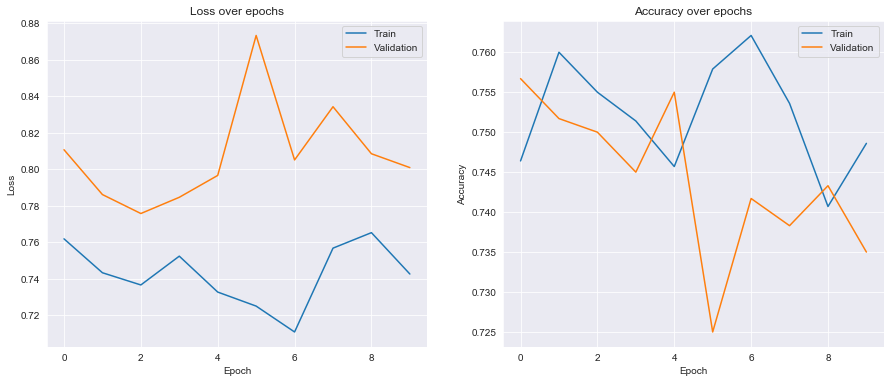

In [77]:
# Training
optim = tf.keras.optimizer.Adam(learning_rate=0.001)
callbacks = callbacks('ensemble2','ensemble2')

resnet_vgg1.compile(loss=loss_function, optimizer=optim, metrics=['accuracy',fs])
 
steps_per_epoch = len(mel_train_dataloader)//BATCH_SIZE
hist_ensemble2 = resnet_vgg1.fit([mel_train_dataloader[:,0],mel_train_dataloader[:,0]],mel_train_dataloader[:,1], epochs = 10, 
                       validation_data=([mel_test_dataloader[:,0],mel_test_dataloader[:,0]],mel_test_dataloader[:,1]),
                       steps_per_epoch=steps_per_epoch, callbacks=callbacks)

plot_summary(hist_ensemble2)

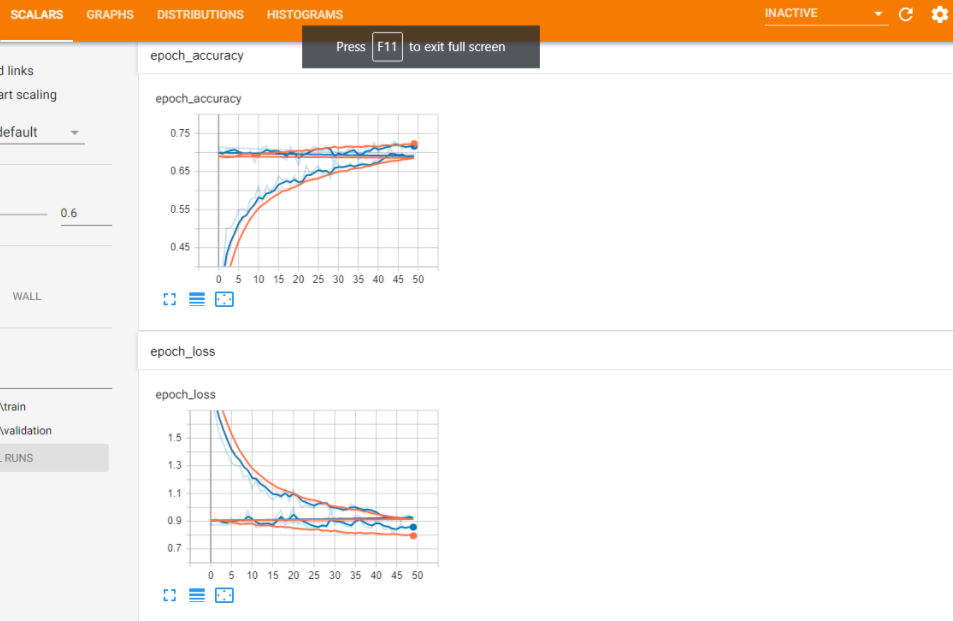

In [88]:
Image('ensemble2.png')

##### Observation
Like last architecture, I combined the resnet and VGG network but instead of the features generated by the last conv block, i combined the output of the last dense layer and then trained another dense layer on top of it to get the output. The results we obtained is 0.74 f1-score which is not better than the previous approach. We observe that these networks are woriking well, so let us try some more networks as well.

#### 7.4.5 VGG and InceptionV3 Ensemble

In [85]:
# fusing resnet and inception network for mel-spectrogram images
input_1 = Input(shape=mel_train_dataloader[0][0].shape[1:])
layer_1 = InceptionV3(include_top=False,weights="imagenet",input_tensor=input_1)
layer_1.trainable = False

input_2 = Input(shape=mel_train_dataloader[0][0].shape[1:])
vgg_2 = VGG16(include_top=False,weights="imagenet",input_tensor=input_2)
vgg_2.trainable = False
for i in vgg_2.layers:
    i._name = i.name+'_2'


average1 = tf.keras.layers.GlobalAveragePooling2D()(layer_1.output)
dense1 = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(average1)
output1 = Dense(NUM_CLASSES,activation='softmax')(dense1)

average2 = tf.keras.layers.GlobalAveragePooling2D()(vgg_2.output)
dense2 = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense2')(average2)
output2 = Dense(NUM_CLASSES,activation='softmax')(dense2)

feature_fuse = concatenate([output1,output2])
output = Dense(NUM_CLASSES,activation='softmax')(feature_fuse)

incep_vgg = Model(inputs=[input_1,input_2],outputs=output)
# incep_vgg.summary()

Epoch 1/10
267/267 [==============================] - 3819s 14s/step - loss: 0.7964 - accuracy: 0.7307 - f1_score: 0.7307 - val_loss: 0.84 - val_accuracy: 0.7317 - val_f1_score: 0.7317
Epoch 2/10
267/267 [==============================] - 3819s 14s/step - loss: 0.7733 - accuracy: 0.7486 - f1_score: 0.7486 - val_loss: 0.8262 - val_accuracy: 0.725 - val_f1_score: 0.725
Epoch 3/10
267/267 [==============================] - 3819s 14s/step - loss: 0.751 - accuracy: 0.7593 - f1_score: 0.7593 - val_loss: 0.8655 - val_accuracy: 0.715 - val_f1_score: 0.715
Epoch 4/10
267/267 [==============================] - 3819s 14s/step - loss: 0.7749 - accuracy: 0.75 - f1_score: 0.75 - val_loss: 0.8926 - val_accuracy: 0.71 - val_f1_score: 0.71
Epoch 5/10
267/267 [==============================] - 3819s 14s/step - loss: 0.7603 - accuracy: 0.7379 - f1_score: 0.7379 - val_loss: 0.827 - val_accuracy: 0.725 - val_f1_score: 0.725
Epoch 6/10
267/267 [==============================] - 3819s 14s/step - loss: 0.7618

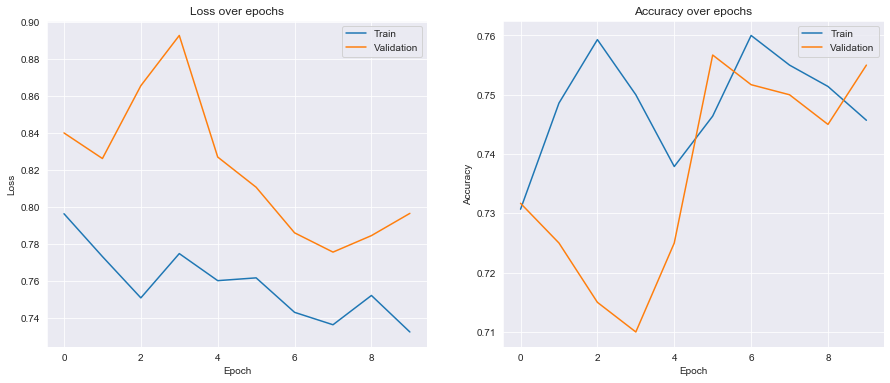

In [72]:
# Training
optim = tf.keras.optimizer.Adam(learning_rate=0.001)
callbacks = callbacks('ensemble3','ensemble3')

incep_vgg.compile(loss=loss_function, optimizer=optim, metrics=['accuracy',fs])
 
steps_per_epoch = len(mel_train_dataloader)//BATCH_SIZE
hist_ensemble3 = incep_vgg.fit([mel_train_dataloader[:,0],mel_train_dataloader[:,0]],mel_train_dataloader[:,1], epochs = 10, 
                       validation_data=([mel_test_dataloader[:,0],mel_test_dataloader[:,0]],mel_test_dataloader[:,1]),
                       steps_per_epoch=steps_per_epoch, callbacks=callbacks)

plot_summary(hist_ensemble3)

##### Observation
similar to last architecture, I combined the inception with VGG network instead of the resnet and combined the output of the last dense layer and then trained another dense layer on top of it to get the output. The results we obtained is 0.74 f1-score which is similar to the previous approach. We have reached at stalemate from these two networks so, let us try some more networks to see if we can still achieve some more.

#### 7.4.6 ResNet50 and InceptionV3 Ensemble

In [ ]:
# fusing resnet and inception network for mel-spectrogram images
# fusing resnet and inception network for mel-spectrogram images
input_1 = Input(shape=mel_train_dataloader[0][0].shape[1:])
layer_1 = InceptionV3(include_top=False,weights="imagenet",input_tensor=input_1)
layer_1.trainable = False

input_2 = Input(shape=mel_train_dataloader[0][0].shape[1:])
layer_2 = ResNet50(include_top=False,weights="imagenet",input_tensor=input_2)
layer_2.trainable = False
for i in layer_2.layers:
    i._name = i.name+'_2'


average1 = tf.keras.layers.GlobalAveragePooling2D()(layer_1.output)
dense1 = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(average1)
output1 = Dense(NUM_CLASSES,activation='softmax')(dense1)

average2 = tf.keras.layers.GlobalAveragePooling2D()(layer_2.output)
dense2 = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense2')(average2)
output2 = Dense(NUM_CLASSES,activation='softmax')(dense2)

feature_fuse = concatenate([output1,output2])
output = Dense(NUM_CLASSES,activation='softmax')(feature_fuse)

incep_res = Model(inputs=[input_1,input_2],outputs=output)
# incep_res.summary()

In [76]:
# Training
optim = tf.keras.optimizer.Adam(learning_rate=0.001)
callbacks = callbacks('ensemble4','ensemble4')

incep_res.compile(loss=loss_function, optimizer=optim, metrics=['accuracy',fs])
 
steps_per_epoch = len(mel_train_dataloader)//BATCH_SIZE
hist_ensemble4 = incep_res.fit([mel_train_dataloader[:,0],mel_train_dataloader[:,0]],mel_train_dataloader[:,1], epochs = 10, 
                       validation_data=([mel_test_dataloader[:,0],mel_test_dataloader[:,0]],mel_test_dataloader[:,1]),
                       steps_per_epoch=steps_per_epoch, callbacks=callbacks)

plot_summary(hist_ensemble4)

Epoch 1/10
267/267 [==============================] - 3819s 14s/step - loss: 0.7365 - accuracy: 0.755 - f1_score: 0.755 - val_loss: 0.7757 - val_accuracy: 0.75 - val_f1_score: 0.75
Epoch 2/10
267/267 [==============================] - 3819s 14s/step - loss: 0.7523 - accuracy: 0.7514 - f1_score: 0.7514 - val_loss: 0.7846 - val_accuracy: 0.745 - val_f1_score: 0.745
Epoch 3/10
267/267 [==============================] - 3819s 14s/step - loss: 0.7326 - accuracy: 0.7457 - f1_score: 0.7457 - val_loss: 0.7966 - val_accuracy: 0.755 - val_f1_score: 0.755
Epoch 4/10
267/267 [==============================] - 3819s 14s/step - loss: 0.7249 - accuracy: 0.7579 - f1_score: 0.7579 - val_loss: 0.8734 - val_accuracy: 0.725 - val_f1_score: 0.725
Epoch 5/10
267/267 [==============================] - 3819s 14s/step - loss: 0.7107 - accuracy: 0.7621 - f1_score: 0.7621 - val_loss: 0.8051 - val_accuracy: 0.7417 - val_f1_score: 0.7417
Epoch 6/10
267/267 [==============================] - 3819s 14s/step - loss: 

##### Observation
similar to last architecture, I combined the inception with resnet network instead of the VGG and combined the output of the last dense layer and then trained another dense layer on top of it to get the output. The results we obtained is 0.75 f1-score which is similar to the previous approach. We observe some improvement here but not better than the bench mark that we achieved when we tried ensembling the features of the resnet and vgg. So, let us summarize these results and what we have did so far.

#### Summary Table

##### PART1
|**Models**|**Parameters**|**Performance**|
|----------|--------------|---------------|
|LSTM|raw audio samples, sgd, learning rate=0.01|0.12|
|LSTM|sampled spectrogram, adam, learning rate=0.01|0.23|
|LSTM|spectrogram, adadelta, learning rate=0.01|0.34|
|ResNet50|spectrogram images, adam, learning rate=0.01|0.44|
|InceptionV3|spectrogram images, adam, learning rate=0.01|0.56|
|DenseNet|spectrogram images, adam, learning rate=0.01|0.48|
|ML Ensemble|resnet, inception, desnenet|0.57|

##### PART2
|**Models**|**Parameters**|**Performance**|
|----------|--------------|---------------|
|VGG16|spectrogram images, adam, learning rate=0.01|0.54|
|VGG16|mel-spectrogram images, adam, learning rate=0.01|0.69|
|ResNet50|mel-spectrogram images, adam, learning rate=0.01|0.72|
|InceptionV3|mel-spectrogram images, adam, learning rate=0.01|0.67|
|Ensemble1|vgg16, resnet50, adam, learning rate=0.01|0.83|
|Ensemble2|vgg16, resnet50, adam, learning rate=0.01|0.76|
|Ensemble3|vgg16, inceptionv3, adam, learning rate=0.01|0.76|
|Ensemble4|inceptionv3, resnet50, adam, learning rate=0.01|0.75|

### Observation on Model Training
let us summarize what we have done till now.
1. We used raw audio samples, spectrogram images and mel-spectrogram images for processed features.
2. The low and high frequency have been removed from the data.
3. In mel-spectrogram data the mel values is converted to power scale with exp value 0.5 to reduce the background noises.
4. Augmentation is done with introduction of gausssian noise, white noise and pitch shifting of the audio.
5. These augmentations is implemented with the help of audiomentations library.
6. The mel-spec and spectrogram images are extracted as 5 seconds clip and is properly normalized, cropped/padded etc. while feeding to the training.
7. The mel-spec and spectrogram images extracted is stacked to make is usabel by the CNN architectures.
8. Keras sequence generator and data loader is used to the load the data in batches while training and evaluation.
9. Multiple networks are used during training and their performance is observed as shown in the above summary table.
10. The first part of the table shows the networks trained with raw data and spectrogram data with LSTM and CNN architectures.
11. As shown in the first part of the summary table not too complex and deep 3-layered with 32 LSTM units network with proper dropout and batchnormalization is trained with spectrogram and raw data. They achieved quite good results upto 0.34 f1-score until we experiment with CNN models.
12. From CNN arictectures to deep CNN we tried four different CNN architectures like VGG16, ResNet50, InceptionV3, and DenseNet. The deep CNNs seemed to be not performing as good as the other achitectures as shown in the table.
13. The Inception architecture is found to be working best for the spectrogram images data with around 0.56 f1-score and resnet and vgg comparatively goog with around 0.54 score.
14. The ML ensemble models trained on the features extracted by these CNN models seemed to achieve good results but does not meet our expectations.

15. Failing to achieve performace more than 60%, we tried these same CNN architectures with some custom ensembling and combination but with different features i.e mel-spectrogram data and some augmentation as well. 
16. The same models for this feature data seemed to be perfroming well as you can verify from the results in the summary table.
17. The VGG16 model achieved the better result from models from part 1 with around 69% performance score.
18. Among all the single architectures the ResNet50 achieves the best result of around 0.72% score with Inception trying to keep up with only 0.67% score.
19. We treid ensembling the features and output generated by these models one by as shwon in the summary table.
20. Two of the best performing networks like VGG16 and ResNet50 when their features is combined together to train another model to classify the calls achieves the best results of 0.83 f1-score.
21. Other ensembles do good as well as can be seen in the summary table.We tried every combination like vgg with resnet, inception, and resnet with inception so that we can know what is working well and what is not.

Now, that we have discussed what worked and best let us discuss what did not work.

1. The simple LSTM network trained is found to performing worst of all with around 0.12 f1-score as shown in the summary table.
2. Among all the optimizers and learning rate adam with learning rate 0.001 worked best for almost all the models while sgd and adadelta behaved poorely except for some modesl as shown in the summary table.
3. Only the good performing training results for each individaul model is here in the notebook as the bad performing ones are overwritten with each training sequence.
4. Spectrograms performed poor that mel-spectrogram as the later reduced the background noise and low and high frequency sound from the audio.
5. Ensembling of features generated by VGG and other CNN networks with spec and mel-spec data performed poorley due to the difference in input shape(spec and mel-spec) as well as and features shape generated by the last conv block except for the resnet and vgg which achieved best results due to their similarity in the architectures. 
6. The ML ensembles did not work well due the complexity of the features generated by the networks.
7. Overall LSTMs performed poor due to inconsistency in the audio files like presence of noise, background sounds and even no sound at all as well as discontinuous calls.